# Book Recommender System
**Team Members:**
1. Saw Xue Yi: Hybrid based, Bert Embeddings
2. Cha Ming En: Collaborative Filtering
3. Hea Hui Min: Content-based

# Import relevant library

In [2]:
# Library for converting the json file to the csv file
import json
import csv
import os

# Common library for data analysis & manipulation
import pandas as pd
import numpy as np

# Abstract Syntax Tree - process the string that represents a list of dictionaries
import ast

# Data Cleaning Purpose
import re
import string
import nltk
from nltk.corpus import stopwords # Stopword retrieval

# Visualization plotting
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# nltk download - run to ensure those needed nltk item has been installed
nltk.download('crubadan')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Data Loading

## Convert json file into csv file format

- The original data get from the website is in the **json format**.
- For the ease of further recommender system development, convert them into csv file
- To ensure the code to be run smoothly, process the file in chunks and combine them at last
- Remark: It may take a long time, the **final csv files used has been provided** along with the submission
- Remark: The file path has changed **(the below code may not work)**, as we put those convertion files in an individual folder (submission organizing purpose) in order to avoid mixture from the actual file used

### Json file to CSV (Books)

In [15]:
# Define file paths
json_file_path = "goodreads_books_children.json"
output_folder = "Chunks_Books"
final_csv_path = "books_data_file.csv"

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Process large JSON file in chunks
chunk_size = 50000  # Number of records per chunk
chunk_count = 0
header_written = False
part_files = []  # List to store chunk file names

with open(json_file_path, "r", encoding="utf-8") as json_file:
    data_buffer = []
    for line in json_file:
        line = line.strip()
        if line:
            try:
                data_buffer.append(json.loads(line))
            except json.JSONDecodeError:
                print(f"Skipping invalid line: {line}")

        # When buffer reaches chunk size, write to CSV
        if len(data_buffer) >= chunk_size:
            chunk_count += 1
            part_file = os.path.join(output_folder, f"part_{chunk_count}.csv")
            part_files.append(part_file)

            # Write data to CSV
            try:
                with open(part_file, "w", newline="", encoding="utf-8") as csv_file:
                    writer = csv.writer(csv_file)
                    if not header_written:
                        writer.writerow(data_buffer[0].keys())  # Write header once
                        header_written = True

                    for item in data_buffer:
                        writer.writerow(item.values())

                print(f"Saved chunk {chunk_count} to {part_file}")

            finally:
                data_buffer.clear()  # Clear buffer only after successful write
                header_written = False; # let the next chunk file has the header

# Save remaining data in the buffer (last chunk)
if data_buffer:
    chunk_count += 1
    part_file = os.path.join(output_folder, f"part_{chunk_count}.csv")
    part_files.append(part_file)

    with open(part_file, "w", newline="", encoding="utf-8") as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(data_buffer[0].keys())
        for item in data_buffer:
            writer.writerow(item.values())

    print(f"Saved final chunk {chunk_count} to {part_file}")

# Merge all CSV chunks into one final CSV file
with open(final_csv_path, "w", newline="", encoding="utf-8") as final_csv:
    writer = csv.writer(final_csv)
    header_written = False

    for part_file in part_files:
        with open(part_file, "r", encoding="utf-8") as part_csv:
            reader = csv.reader(part_csv)
            header = next(reader)
            if not header_written:
                writer.writerow(header)  # Write header only once
                header_written = True
            for row in reader:
                writer.writerow(row)

print(f"Final merged CSV saved to {final_csv_path}")

Saved chunk 1 to Chunks_Books\part_1.csv
Saved chunk 2 to Chunks_Books\part_2.csv
Saved final chunk 3 to Chunks_Books\part_3.csv
Final merged CSV saved to books_data_file.csv


In [17]:
# Define the file path
csv_file_path = "books_data_file.csv"  

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Count the total number of rows
total_rows = len(df)

print(f"Total number of rows: {total_rows}")

Total number of rows: 124082


### Json File to CSV (Reviews)

In [9]:
# Define file paths
json_file_path = "goodreads_reviews_children.json"
output_folder = "Chunks_Reviews"
final_csv_path = "reviews_data_file.csv"

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Process large JSON file in chunks
chunk_size = 50000  # Number of records per chunk
chunk_count = 0
header_written = False
part_files = []  # List to store chunk file names

with open(json_file_path, "r", encoding="utf-8") as json_file:
    data_buffer = []
    for line in json_file:
        line = line.strip()
        if line:
            try:
                data_buffer.append(json.loads(line))
            except json.JSONDecodeError:
                print(f"Skipping invalid line: {line}")

        # When buffer reaches chunk size, write to CSV
        if len(data_buffer) >= chunk_size:
            chunk_count += 1
            part_file = os.path.join(output_folder, f"part_{chunk_count}.csv")
            part_files.append(part_file)

            # Write data to CSV
            try:
                with open(part_file, "w", newline="", encoding="utf-8") as csv_file:
                    writer = csv.writer(csv_file)
                    if not header_written:
                        writer.writerow(data_buffer[0].keys())  # Write header once
                        header_written = True

                    for item in data_buffer:
                        writer.writerow(item.values())

                print(f"Saved chunk {chunk_count} to {part_file}")

            finally:
                data_buffer.clear()  # Clear buffer only after successful write
                header_written = False; # let the next chunk file has the header

# Save remaining data in the buffer (last chunk)
if data_buffer:
    chunk_count += 1
    part_file = os.path.join(output_folder, f"part_{chunk_count}.csv")
    part_files.append(part_file)

    with open(part_file, "w", newline="", encoding="utf-8") as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(data_buffer[0].keys())
        for item in data_buffer:
            writer.writerow(item.values())

    print(f"Saved final chunk {chunk_count} to {part_file}")

# Merge all CSV chunks into one final CSV file
with open(final_csv_path, "w", newline="", encoding="utf-8") as final_csv:
    writer = csv.writer(final_csv)
    header_written = False

    for part_file in part_files:
        with open(part_file, "r", encoding="utf-8") as part_csv:
            reader = csv.reader(part_csv)
            header = next(reader)
            if not header_written:
                writer.writerow(header)  # Write header only once
                header_written = True
            for row in reader:
                writer.writerow(row)

print(f"Final merged CSV saved to {final_csv_path}")

Saved chunk 1 to Chunks_Reviews\part_1.csv
Saved chunk 2 to Chunks_Reviews\part_2.csv
Saved chunk 3 to Chunks_Reviews\part_3.csv
Saved chunk 4 to Chunks_Reviews\part_4.csv
Saved chunk 5 to Chunks_Reviews\part_5.csv
Saved chunk 6 to Chunks_Reviews\part_6.csv
Saved chunk 7 to Chunks_Reviews\part_7.csv
Saved chunk 8 to Chunks_Reviews\part_8.csv
Saved chunk 9 to Chunks_Reviews\part_9.csv
Saved chunk 10 to Chunks_Reviews\part_10.csv
Saved chunk 11 to Chunks_Reviews\part_11.csv
Saved chunk 12 to Chunks_Reviews\part_12.csv
Saved chunk 13 to Chunks_Reviews\part_13.csv
Saved chunk 14 to Chunks_Reviews\part_14.csv
Saved final chunk 15 to Chunks_Reviews\part_15.csv
Final merged CSV saved to reviews_data_file.csv


In [11]:
# Define the file path
csv_file_path = "reviews_data_file.csv"  

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Count the total number of rows
total_rows = len(df)

print(f"Total number of rows: {total_rows}")

Total number of rows: 734640


### Json file to CSV (Interactions)

In [33]:
# Define file paths
json_file_path = "goodreads_interactions_children.json"
output_folder = "Chunks"
final_csv_path = "interactions_data_file.csv"

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Process large JSON file in chunks
chunk_size = 50000  # Number of records per chunk
chunk_count = 0
header_written = False
part_files = []  # List to store chunk file names

with open(json_file_path, "r", encoding="utf-8") as json_file:
    data_buffer = []
    for line in json_file:
        line = line.strip()
        if line:
            try:
                data_buffer.append(json.loads(line))
            except json.JSONDecodeError:
                print(f"Skipping invalid line: {line}")

        # When buffer reaches chunk size, write to CSV
        if len(data_buffer) >= chunk_size:
            chunk_count += 1
            part_file = os.path.join(output_folder, f"part_{chunk_count}.csv")
            part_files.append(part_file)

            # Write data to CSV
            try:
                with open(part_file, "w", newline="", encoding="utf-8") as csv_file:
                    writer = csv.writer(csv_file)
                    if not header_written:
                        writer.writerow(data_buffer[0].keys())  # Write header once
                        header_written = True

                    for item in data_buffer:
                        writer.writerow(item.values())

                print(f"Saved chunk {chunk_count} to {part_file}")

            finally:
                data_buffer.clear()  # Clear buffer only after successful write
                header_written = False; # let the next chunk file has the header

# Save remaining data in the buffer (last chunk)
if data_buffer:
    chunk_count += 1
    part_file = os.path.join(output_folder, f"part_{chunk_count}.csv")
    part_files.append(part_file)

    with open(part_file, "w", newline="", encoding="utf-8") as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(data_buffer[0].keys())
        for item in data_buffer:
            writer.writerow(item.values())

    print(f"Saved final chunk {chunk_count} to {part_file}")

# Merge all CSV chunks into one final CSV file
with open(final_csv_path, "w", newline="", encoding="utf-8") as final_csv:
    writer = csv.writer(final_csv)
    header_written = False

    for part_file in part_files:
        with open(part_file, "r", encoding="utf-8") as part_csv:
            reader = csv.reader(part_csv)
            header = next(reader)
            if not header_written:
                writer.writerow(header)  # Write header only once
                header_written = True
            for row in reader:
                writer.writerow(row)

print(f"Final merged CSV saved to {final_csv_path}")

Saved chunk 1 to Chunks\part_1.csv
Saved chunk 2 to Chunks\part_2.csv
Saved chunk 3 to Chunks\part_3.csv
Saved chunk 4 to Chunks\part_4.csv
Saved chunk 5 to Chunks\part_5.csv
Saved chunk 6 to Chunks\part_6.csv
Saved chunk 7 to Chunks\part_7.csv
Saved chunk 8 to Chunks\part_8.csv
Saved chunk 9 to Chunks\part_9.csv
Saved chunk 10 to Chunks\part_10.csv
Saved chunk 11 to Chunks\part_11.csv
Saved chunk 12 to Chunks\part_12.csv
Saved chunk 13 to Chunks\part_13.csv
Saved chunk 14 to Chunks\part_14.csv
Saved chunk 15 to Chunks\part_15.csv
Saved chunk 16 to Chunks\part_16.csv
Saved chunk 17 to Chunks\part_17.csv
Saved chunk 18 to Chunks\part_18.csv
Saved chunk 19 to Chunks\part_19.csv
Saved chunk 20 to Chunks\part_20.csv
Saved chunk 21 to Chunks\part_21.csv
Saved chunk 22 to Chunks\part_22.csv
Saved chunk 23 to Chunks\part_23.csv
Saved chunk 24 to Chunks\part_24.csv
Saved chunk 25 to Chunks\part_25.csv
Saved chunk 26 to Chunks\part_26.csv
Saved chunk 27 to Chunks\part_27.csv
Saved chunk 28 to C

In [5]:
# Define the file path
csv_file_path = "interactions_data_file.csv" 

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Count the total number of rows
total_rows = len(df)

print(f"Total number of rows: {total_rows}")

Total number of rows: 10059349


### Json file to CSV (Author Data)

In [34]:
# Define file paths
json_file_path = "goodreads_book_authors.json"
output_folder = "Chunks_Author"
final_csv_path = "authors_data_file.csv"

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Process large JSON file in chunks
chunk_size = 50000  # Number of records per chunk
chunk_count = 0
header_written = False
part_files = []  # List to store chunk file names

with open(json_file_path, "r", encoding="utf-8") as json_file:
    data_buffer = []
    for line in json_file:
        line = line.strip()
        if line:
            try:
                data_buffer.append(json.loads(line))
            except json.JSONDecodeError:
                print(f"Skipping invalid line: {line}")

        # When buffer reaches chunk size, write to CSV
        if len(data_buffer) >= chunk_size:
            chunk_count += 1
            part_file = os.path.join(output_folder, f"part_{chunk_count}.csv")
            part_files.append(part_file)

            # Write data to CSV
            try:
                with open(part_file, "w", newline="", encoding="utf-8") as csv_file:
                    writer = csv.writer(csv_file)
                    if not header_written:
                        writer.writerow(data_buffer[0].keys())  # Write header once
                        header_written = True

                    for item in data_buffer:
                        writer.writerow(item.values())

                print(f"Saved chunk {chunk_count} to {part_file}")

            finally:
                data_buffer.clear()  # Clear buffer only after successful write
                header_written = False; # let the next chunk file has the header

# Save remaining data in the buffer (last chunk)
if data_buffer:
    chunk_count += 1
    part_file = os.path.join(output_folder, f"part_{chunk_count}.csv")
    part_files.append(part_file)

    with open(part_file, "w", newline="", encoding="utf-8") as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(data_buffer[0].keys())
        for item in data_buffer:
            writer.writerow(item.values())

    print(f"Saved final chunk {chunk_count} to {part_file}")

# Merge all CSV chunks into one final CSV file
with open(final_csv_path, "w", newline="", encoding="utf-8") as final_csv:
    writer = csv.writer(final_csv)
    header_written = False

    for part_file in part_files:
        with open(part_file, "r", encoding="utf-8") as part_csv:
            reader = csv.reader(part_csv)
            header = next(reader)
            if not header_written:
                writer.writerow(header)  # Write header only once
                header_written = True
            for row in reader:
                writer.writerow(row)

print(f"Final merged CSV saved to {final_csv_path}")

Saved chunk 1 to Chunks_Author\part_1.csv
Saved chunk 2 to Chunks_Author\part_2.csv
Saved chunk 3 to Chunks_Author\part_3.csv
Saved chunk 4 to Chunks_Author\part_4.csv
Saved chunk 5 to Chunks_Author\part_5.csv
Saved chunk 6 to Chunks_Author\part_6.csv
Saved chunk 7 to Chunks_Author\part_7.csv
Saved chunk 8 to Chunks_Author\part_8.csv
Saved chunk 9 to Chunks_Author\part_9.csv
Saved chunk 10 to Chunks_Author\part_10.csv
Saved chunk 11 to Chunks_Author\part_11.csv
Saved chunk 12 to Chunks_Author\part_12.csv
Saved chunk 13 to Chunks_Author\part_13.csv
Saved chunk 14 to Chunks_Author\part_14.csv
Saved chunk 15 to Chunks_Author\part_15.csv
Saved chunk 16 to Chunks_Author\part_16.csv
Saved final chunk 17 to Chunks_Author\part_17.csv
Final merged CSV saved to authors_data_file.csv


In [39]:
# Define the file path
csv_file_path = "authors_data_file.csv" 

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Count the total number of rows
total_rows = len(df)

print(f"Total number of rows: {total_rows}")

Total number of rows: 829529


## Load dataset

### Book data

In [914]:
book_df = pd.read_csv("books_data_file.csv")
book_df.head(5)

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,1599150603,7,[],US,NaN,"[{'count': '56', 'name': 'to-read'}, {'count':...",NaN,False,4.13,B00DU10PUG,...,9.0,NaN,2006.0,https://www.goodreads.com/book/show/287141.The...,https://s.gr-assets.com/assets/nophoto/book/11...,287141,46,278578,The Aeneid for Boys and Girls,The Aeneid for Boys and Girls
1,1934876569,6,['151854'],US,NaN,"[{'count': '515', 'name': 'to-read'}, {'count'...",NaN,False,4.22,NaN,...,3.0,NaN,2009.0,https://www.goodreads.com/book/show/6066812-al...,https://images.gr-assets.com/books/1316637798m...,6066812,98,701117,All's Fairy in Love and War (Avalon: Web of Ma...,All's Fairy in Love and War (Avalon: Web of Ma...
2,0590417010,193,[],US,eng,"[{'count': '450', 'name': 'to-read'}, {'count'...",NaN,False,4.43,B017RORXNI,...,9.0,NaN,1995.0,https://www.goodreads.com/book/show/89378.Dog_...,https://images.gr-assets.com/books/1360057676m...,89378,1331,86259,Dog Heaven,Dog Heaven
3,0915190575,4,[],US,NaN,"[{'count': '8', 'name': 'to-read'}, {'count': ...",NaN,False,4.29,NaN,...,NaN,NaN,NaN,https://www.goodreads.com/book/show/3209312-mo...,https://s.gr-assets.com/assets/nophoto/book/11...,3209312,11,3242879,"Moths and Mothers, Feathers and Fathers: A Sto...","Moths and Mothers, Feathers and Fathers: A Sto..."
4,1416904999,4,[],US,NaN,"[{'count': '8', 'name': 'to-read'}, {'count': ...",NaN,False,3.57,NaN,...,6.0,NaN,2005.0,https://www.goodreads.com/book/show/1698376.Wh...,https://s.gr-assets.com/assets/nophoto/book/11...,1698376,23,1695373,What Do You Do?,What Do You Do?


### Review data
- Store the data relates to the reviews that the user made

In [915]:
review_df = pd.read_csv("reviews_data_file.csv")
review_df.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,23310161,f4b4b050f4be00e9283c92a814af2670,4,Fun sequel to the original.,Tue Nov 17 11:37:35 -0800 2015,Tue Nov 17 11:38:05 -0800 2015,NaN,NaN,7,0
1,8842281e1d1347389f2ab93d60773d4d,17290220,22d424a2b0057b18fb6ecf017af7be92,5,One of my favorite books to read to my 5 year ...,Sat Nov 08 08:54:03 -0800 2014,Wed Jan 25 13:56:12 -0800 2017,Tue Jan 24 00:00:00 -0800 2017,NaN,4,0
2,8842281e1d1347389f2ab93d60773d4d,6954929,50ed4431c451d5677d98dd25ca8ec106,5,One of the best and most imaginative childrens...,Thu Oct 23 13:46:20 -0700 2014,Thu Oct 23 13:47:00 -0700 2014,NaN,NaN,6,1
3,8842281e1d1347389f2ab93d60773d4d,460548,1e4de11dd4fa4b7ffa59b6c69a6b28e9,5,My daughter is loving this. Published in the 6...,Mon Dec 02 10:43:59 -0800 2013,Wed Mar 22 11:47:25 -0700 2017,NaN,NaN,5,4
4,8842281e1d1347389f2ab93d60773d4d,11474551,2065145714bf747083a1c9ce81d5c4fe,5,A friend sent me this. Hilarious!,Wed May 11 22:38:11 -0700 2011,Sun Jan 29 15:56:41 -0800 2012,Wed May 11 00:00:00 -0700 2011,Wed May 11 00:00:00 -0700 2011,5,0


### Interaction data
- store all the user's interaction data
- The column 'is_read' indicates whether the user has read the book or just click on it

In [918]:
interaction_df = pd.read_csv("interactions_data_file.csv")
interaction_df.head()

,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
0,8842281e1d1347389f2ab93d60773d4d,10893214,5d0e4e8825c68740703f65a18813fc93,False,0,NaN,Fri Feb 24 09:00:30 -0800 2017,Fri Feb 24 09:00:30 -0800 2017,NaN,NaN
1,8842281e1d1347389f2ab93d60773d4d,33282947,f171a68daa8092d8aea3dccc2e025a81,False,0,NaN,Fri Feb 10 10:47:53 -0800 2017,Fri Feb 10 10:48:21 -0800 2017,NaN,NaN
2,8842281e1d1347389f2ab93d60773d4d,11387515,2fd3cd1acb30b099c135e358669639da,False,0,NaN,Thu Jan 26 13:35:10 -0800 2017,Thu Jan 26 13:35:10 -0800 2017,NaN,NaN
3,8842281e1d1347389f2ab93d60773d4d,24396144,d210e41fcc7e6dcd6ae896844a38a024,False,0,NaN,Thu Dec 15 15:37:54 -0800 2016,Thu Dec 15 15:37:55 -0800 2016,NaN,NaN
4,8842281e1d1347389f2ab93d60773d4d,20484662,a99f9fa4ec4fd94cc2419c78af2086a8,False,0,NaN,Sun May 15 14:49:50 -0700 2016,Sun May 15 14:49:51 -0700 2016,NaN,NaN


# Data Understanding & Data Preprocessing 

In [920]:
# Dataset's dimension
print("Book dataset: ", book_df.shape)
print("Review dataset: ", review_df.shape)
print("Interaction dataset: ", interaction_df.shape)

Book dataset:  (124082, 29)
Review dataset:  (734640, 11)
Interaction dataset:  (10059349, 10)


## Book Dataset Information

In [922]:
# View all the columns and the data type
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124082 entries, 0 to 124081
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   isbn                  103883 non-null  object 
 1   text_reviews_count    124082 non-null  int64  
 2   series                124082 non-null  object 
 3   country_code          124082 non-null  object 
 4   language_code         51586 non-null   object 
 5   popular_shelves       124082 non-null  object 
 6   asin                  6719 non-null    object 
 7   is_ebook              124082 non-null  bool   
 8   average_rating        124082 non-null  float64
 9   kindle_asin           41122 non-null   object 
 10  similar_books         124082 non-null  object 
 11  description           108843 non-null  object 
 12  format                103043 non-null  object 
 13  link                  124082 non-null  object 
 14  authors               124082 non-null  object 
 15  

In [924]:
# Check the number of null data in this book dataset
book_df.isnull().sum()

isbn                     20199
text_reviews_count           0
series                       0
country_code                 0
language_code            72496
popular_shelves              0
asin                    117363
is_ebook                     0
average_rating               0
kindle_asin              82960
similar_books                0
description              15239
format                   21039
link                         0
authors                      0
publisher                20145
num_pages                28197
publication_day          38472
isbn13                   15489
publication_month        34068
edition_information     118307
publication_year         19826
url                          0
image_url                    0
book_id                      0
ratings_count                0
work_id                      0
title                        1
title_without_series         1
dtype: int64

Analysis: Insight about most of the book's average rating and the ratings count
- average rating record shows that most of the book are having the rating above 3.5
- Based on the result, when doing the collaborative filtering, the third quantile will be take as the consideration to filter the book with lesser rating record

In [82]:
book_df[['average_rating', 'ratings_count']].describe()

,average_rating,ratings_count
count,124082.000000,1.240820e+05
mean,3.910883,5.228165e+02
std,0.364855,1.083869e+04
min,0.000000,0.000000e+00
25%,3.710000,1.000000e+01
50%,3.940000,3.000000e+01
75%,4.140000,9.600000e+01
max,5.000000,1.876252e+06


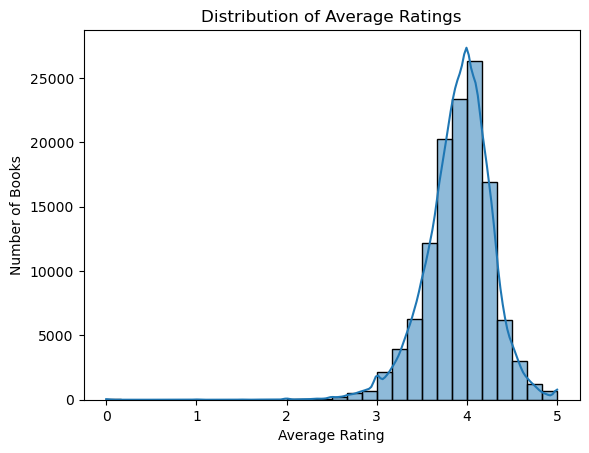

In [75]:
sns.histplot(book_df['average_rating'], bins=30, kde=True)
plt.title("Distribution of Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Number of Books")
plt.show()

## Preprocessing for Book Data

### Handle empty title column

Assumption: The book with different series are different, hence we treat the columns title & title_without_series as the same
- We only remain the title column for the further training, as the title_without_series may resulting in duplicate data, but we are treating them as different book, hence these columns may affect the recommendation performance
- However, above result shows there is one empty cell in the title column, before removing the title_without_series column, we need to check whether the empty cell can be replaced with the value at the column title_without_series or not

In [54]:
book_df.title_without_series.duplicated().count()

124082

In [49]:
book_df[book_df.title_without_series.isnull()]

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
46881,0440428475,3,[],US,NaN,"[{'count': '186', 'name': 'to-read'}, {'count'...",NaN,False,3.63,NaN,...,4.0,NaN,1985.0,https://www.goodreads.com/book/show/2433394,https://s.gr-assets.com/assets/nophoto/book/11...,2433394,8,2440582,NaN,NaN


- Result shows the column is empty at both title and title_without_series columns, hence this row will be dropped as it is missing the most important information, which is the book title.
- Those unused columns will be removed at the same time, only those useful features will be brought to the further cleaning step

### Filter the relevant columns 

In [416]:
# Other columns not take in considered as some contains too much missing data or not carried hgih weightage in book recommender
remain_columns = ['text_reviews_count', 'language_code', 'popular_shelves', 'average_rating', 'similar_books', 'description', 'authors', 'publisher', 
                  'book_id', 'ratings_count', 'title']
new_book_df = book_df[remain_columns]

# Drop the column with the empty title
new_book_df = new_book_df.dropna(subset=['title'])

new_book_df.head()

,text_reviews_count,language_code,popular_shelves,average_rating,similar_books,description,authors,publisher,book_id,ratings_count,title
0,7,NaN,"[{'count': '56', 'name': 'to-read'}, {'count':...",4.13,[],"Relates in vigorous prose the tale of Aeneas, ...","[{'author_id': '3041852', 'role': ''}]",Yesterday's Classics,287141,46,The Aeneid for Boys and Girls
1,6,NaN,"[{'count': '515', 'name': 'to-read'}, {'count'...",4.22,"['948696', '439885', '274955', '12978730', '37...","To Kara's astonishment, she discovers that a p...","[{'author_id': '19158', 'role': ''}]",Seven Seas,6066812,98,All's Fairy in Love and War (Avalon: Web of Ma...
2,193,eng,"[{'count': '450', 'name': 'to-read'}, {'count'...",4.43,"['834493', '452189', '140185', '1897316', '218...",In Newbery Medalist Cynthia Rylant's classic b...,"[{'author_id': '5411', 'role': ''}]",Blue Sky Press,89378,1331,Dog Heaven
3,4,NaN,"[{'count': '8', 'name': 'to-read'}, {'count': ...",4.29,[],NaN,"[{'author_id': '589328', 'role': ''}, {'author...",NaN,3209312,11,"Moths and Mothers, Feathers and Fathers: A Sto..."
4,4,NaN,"[{'count': '8', 'name': 'to-read'}, {'count': ...",3.57,[],WHAT DO YOU DO?\nA hen lays eggs...\nA cow giv...,"[{'author_id': '169159', 'role': ''}]",Little Simon,1698376,23,What Do You Do?


In [418]:
new_book_df.isnull().sum()

text_reviews_count        0
language_code         72495
popular_shelves           0
average_rating            0
similar_books             0
description           15239
authors                   0
publisher             20145
book_id                   0
ratings_count             0
title                     0
dtype: int64

### Impute data for the missing data at the publisher column

In [420]:
new_book_df[["publisher"]] = new_book_df[["publisher"]].fillna("unknown")

In [422]:
new_book_df.isnull().sum()

text_reviews_count        0
language_code         72495
popular_shelves           0
average_rating            0
similar_books             0
description           15239
authors                   0
publisher                 0
book_id                   0
ratings_count             0
title                     0
dtype: int64

### Description Column Handling

In [424]:
# Drop the empty description column as less information can be used for the content-based recommender system training
new_book_df = new_book_df.dropna(subset=['description'])

In [426]:
new_book_df.isnull().sum()

text_reviews_count        0
language_code         62621
popular_shelves           0
average_rating            0
similar_books             0
description               0
authors                   0
publisher                 0
book_id                   0
ratings_count             0
title                     0
dtype: int64

In [428]:
new_book_df.description[124079]

'"A perfect reminder to always be on the lookout for magic and wonder. Sometimes, we need those two things the most" (Brightly.com, citing "Books That Teach Kids What It Means to Be a Kind Person").\nIn this breathtaking jacketed picture book, Neil Gaiman\'s lyrical poem guides a novice traveler through the enchanted woods of a fairy tale--through lush gardens, a formidable castle, and over a perilous river--to find the way home again.\nIllustrated in full color by Charles Vess, Instructionsfeatures lush images of mythical creatures, magical landscapes, and canny princesses. Its message of the value of courage, wit, and wisdom makes it a perfect gift.'

- Preprocessing step on the description column to keep only those useful word for further training

In [430]:
# Remove stopword also as the description column will be used for keyword searching as the further stage
# Stopword does not contribute useful information for the book's content --> can be ignored
stop_words = set(stopwords.words('english'))

# Function to clean description text
def clean_description(text):
    if not isinstance(text, str):
        return ""
        
    # Lowercase
    text = text.lower()
    
    # Remove URLs and HTML tags
    text = re.sub(r'http\S+|www\S+|<.*?>', '', text)
    
    # Remove citations
    text = re.sub(r'\(.*?\)', '', text)
    
    # Remove newlines
    text = text.replace('\n', ' ')  
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words] 

    return ' '.join(words)

# Apply cleaning function
new_book_df['description'] = new_book_df['description'].apply(clean_description)

In [431]:
new_book_df.description[124079]

'perfect reminder always lookout magic wonder sometimes need two things breathtaking jacketed picture book neil gaimans lyrical poem guides novice traveler enchanted woods fairy talethrough lush gardens formidable castle perilous riverto find way home illustrated full color charles vess instructionsfeatures lush images mythical creatures magical landscapes canny princesses message value courage wit wisdom makes perfect gift'

In [432]:
# Remove book description with short length
# Find description word count
new_book_df["length"] = [len(d.split()) for d in new_book_df['description'].tolist()]

new_book_df[new_book_df.length.isin(range(0,4))][["book_id", "title", "description", "length"]]\
.sort_values(by=["length"], ascending=True).head(5)

,book_id,title,description,length
66617,9642627,Beauty and the Beast,,0
107917,13598868,"Anita e as 4 Estações (Série Anita, #10)",,0
107486,24664137,فونتشيتو والقمر,,0
107151,9249695,A Maravilhosa Viagem de Nils Holgersson Atravé...,,0
9075,12032907,Alice au pays des merveilles,,0


- As we have done some preprocessing steps on the description column, we see empty strings in the description, lets first convert them to NaN and then remove them

In [434]:
new_book_df.description = new_book_df.description.replace(r'^\s*$', np.nan, regex=True)

new_book_df[new_book_df.length.isin(range(0,4))][["book_id", "title", "description", "length"]]\
.sort_values(by=["length"], ascending=True).head(5)

,book_id,title,description,length
66617,9642627,Beauty and the Beast,NaN,0
107917,13598868,"Anita e as 4 Estações (Série Anita, #10)",NaN,0
107486,24664137,فونتشيتو والقمر,NaN,0
107151,9249695,A Maravilhosa Viagem de Nils Holgersson Atravé...,NaN,0
9075,12032907,Alice au pays des merveilles,NaN,0


In [437]:
new_book_df.dropna(subset=["description"], inplace=True)

new_book_df[new_book_df.length.isin(range(0,4))][["book_id", "title", "description", "length"]]\
.sort_values(by=["length"], ascending=True).head(5)

,book_id,title,description,length
35357,1513808,The Jungle Books,vols,1
123762,27868418,Zip it: A Fancy Book of Fastenings,zip,1
84626,1759396,Young Years: Best Loved Stories and Poems for ...,book,1
95041,10185438,"My Bookhouse: Story Time (My Book House, #2)",volume,1
95408,41559,Peek-a-Boo!,os,1


In [441]:
# Drop records with very short description
new_book_df.drop(new_book_df.index[new_book_df.length.isin(range(0,4))], inplace = True)
print(new_book_df[new_book_df.length.isin(range(0,4))].shape[0])
del new_book_df["length"]

0


### Handle popular_shelves column

In [444]:
new_book_df.popular_shelves[136]

"[{'count': '603', 'name': 'to-read'}, {'count': '213', 'name': 'picture-books'}, {'count': '69', 'name': 'picture-book'}, {'count': '62', 'name': 'animals'}, {'count': '41', 'name': 'childrens'}, {'count': '33', 'name': 'children-s-books'}, {'count': '31', 'name': 'storytime'}, {'count': '24', 'name': 'children'}, {'count': '21', 'name': 'children-s'}, {'count': '17', 'name': 'kids'}, {'count': '16', 'name': 'fiction'}, {'count': '14', 'name': 'kids-books'}, {'count': '12', 'name': 'preschool'}, {'count': '12', 'name': 'childrens-books'}, {'count': '12', 'name': 'picture'}, {'count': '9', 'name': 'feelings'}, {'count': '8', 'name': 'story-time'}, {'count': '8', 'name': 'storytime-books'}, {'count': '8', 'name': 'toddler'}, {'count': '8', 'name': 'favorites'}, {'count': '7', 'name': 'currently-reading'}, {'count': '7', 'name': 'kevin-henkes'}, {'count': '7', 'name': 'children-s-picture-books'}, {'count': '7', 'name': 'children-s-literature'}, {'count': '7', 'name': 'board-books'}, {'co

In [446]:
def extract_relevant_shelves(shelf_string):
    try:
        shelves = ast.literal_eval(shelf_string) # Return the result as a list of dictionaries with two keys: name & count
    except (ValueError, SyntaxError):
        return []

    default_shelves = {
        'to-read', 'currently-reading', 'read', 'favorites', 'owned', 're-reads', 'did-not-finish', 'dnf',
        'wishlist', 'wish-list', 'borrowed', 'ebook', 'audiobook', 'default', 'abandoned', 'own-ebook', 'scanned-own'
    }

    def is_valid(name, count):
        if int(count) <= 5:
            return False
        if name in default_shelves:
            return False
        if re.search(r'\d', name):  # contains digit
            return False
        if name.count('-') > 1:     # too many hyphens (likely a personal label)
            return False
        return True

    return [shelf['name'] for shelf in shelves if is_valid(shelf['name'], shelf['count'])]

new_book_df['popular_shelves'] = new_book_df['popular_shelves'].apply(extract_relevant_shelves)

In [447]:
new_book_df.popular_shelves[136]

['picture-books',
 'picture-book',
 'animals',
 'childrens',
 'storytime',
 'children',
 'children-s',
 'kids',
 'fiction',
 'kids-books',
 'preschool',
 'childrens-books',
 'picture',
 'feelings',
 'story-time',
 'storytime-books',
 'toddler',
 'kevin-henkes',
 'board-books',
 'library',
 'nature',
 'pre-k',
 'juvenile',
 'picturebooks',
 'colors',
 'kindergarten']

### Handle Authors Column

In [449]:
new_book_df.authors[1235]

"[{'author_id': '6757783', 'role': ''}, {'author_id': '6757784', 'role': ''}]"

In [450]:
def extract_main_author_ids(author_string):
    try:
        authors = ast.literal_eval(author_string)
    except (ValueError, SyntaxError):
        return []

    return [author['author_id'] for author in authors if author.get('role', '').strip() == '']

In [451]:
# Extract author id
new_book_df.authors = new_book_df['authors'].apply(extract_main_author_ids)

In [452]:
new_book_df.authors[1235]

['6757783', '6757784']

In [453]:
# Load the author information csv file
author_df = pd.read_csv('authors_data_file.csv')  
author_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829529 entries, 0 to 829528
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   average_rating      829529 non-null  float64
 1   author_id           829529 non-null  int64  
 2   text_reviews_count  829529 non-null  int64  
 3   name                829524 non-null  object 
 4   ratings_count       829529 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 31.6+ MB


In [454]:
# The author id is integer at the author dataset --> change it to string for the mapping
author_df['author_id'] = author_df['author_id'].astype(str)
author_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829529 entries, 0 to 829528
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   average_rating      829529 non-null  float64
 1   author_id           829529 non-null  object 
 2   text_reviews_count  829529 non-null  int64  
 3   name                829524 non-null  object 
 4   ratings_count       829529 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 31.6+ MB


In [455]:
# convert it to a dictionary for fast mapping
author_id_to_name = author_df.set_index('author_id')['name'].to_dict()
author_id_to_name

{'604031': 'Ronald J. Fields',
 '626222': 'Anita Diamant',
 '10333': 'Barbara Hambly',
 '9212': 'Jennifer Weiner',
 '149918': 'Nigel Pennick',
 '3041852': 'Alfred J. Church',
 '215594': 'Michael Halberstam',
 '19158': 'Rachel Roberts',
 '5807700': 'V.L. Locey',
 '2983296': 'Anton Szandor LaVey',
 '40075': 'Kenneth Anger',
 '37778': 'Bernard Knight',
 '242185': 'Carolyn Haines',
 '27397': 'Benjamin Hoff',
 '35259': 'Christopher Ross',
 '3083854': 'Tom Wolfe',
 '39054': 'Don Piper',
 '11099': 'Cecil Murphey',
 '4862': 'Randy Alcorn',
 '137561': 'Jennifer L. Holm',
 '5411': 'Cynthia Rylant',
 '4092328': 'Margot Hovley',
 '75424': 'Wayne Kinsey',
 '1357577': 'Francoise Sagan',
 '3389': 'Stephen King',
 '105602': 'Edward Herrmann',
 '31308': 'Peter Maass',
 '50873': 'L.J. Smith',
 '232533': 'Anne Emmert',
 '166520': 'Christopher Michael McDonough',
 '166517': 'Richard E. Prior',
 '3958428': 'Mark Jackson Stansbury',
 '3958429': 'Mark Stansbury',
 '6536612': 'Zabrina Murray',
 '15585': 'Jame

In [460]:
# Map each list of IDs to their corresponding names
new_book_df['authors'] = new_book_df['authors'].apply(
    lambda id_list: [author_id_to_name.get(str(aid), 'Unknown') for aid in id_list]
)

In [461]:
new_book_df.authors[1235]

['Aleksandra Mizielinska', 'Daniel Mizielinski']

### Handle all text column

In [469]:
# Convert raw list of authors to a TF-IDF friendly string
new_book_df['authors'] = new_book_df['authors'].apply(
    lambda x: ' '.join([a.lower().replace(' ', '_') for a in x]) if isinstance(x, list) else ''
)
new_book_df.authors[1235]

'aleksandra_mizielinska daniel_mizielinski'

In [471]:
# Convert filtered shelves (list) to a TF-IDF friendly string
new_book_df['popular_shelves'] = new_book_df['popular_shelves'].apply(
    lambda x: ' '.join([s.lower().replace(' ', '_') for s in x]) if isinstance(x, list) else ''
)

new_book_df.popular_shelves[136]

'picture-books picture-book animals childrens storytime children children-s kids fiction kids-books preschool childrens-books picture feelings story-time storytime-books toddler kevin-henkes board-books library nature pre-k juvenile picturebooks colors kindergarten'

In [473]:
# Remove extra spaces from the text columns and convert the lettercase to lower
new_book_df[["title", "description", "publisher"]] = new_book_df[["title", "description", "publisher"]].astype(str).apply(
    lambda col: col.str.lower().str.strip()
)
new_book_df.head()

,text_reviews_count,language_code,popular_shelves,average_rating,similar_books,description,authors,publisher,book_id,ratings_count,title
0,7,NaN,,4.13,[],relates vigorous prose tale aeneas legendary a...,alfred_j._church,yesterday's classics,287141,46,the aeneid for boys and girls
1,6,NaN,fantasy magic avalon young-adult series fiction,4.22,"['948696', '439885', '274955', '12978730', '37...",karas astonishment discovers portal opened bed...,rachel_roberts,seven seas,6066812,98,all's fairy in love and war (avalon: web of ma...
2,193,eng,picture-books animals childrens dogs death chi...,4.43,"['834493', '452189', '140185', '1897316', '218...",newbery medalist cynthia rylants classic bests...,cynthia_rylant,blue sky press,89378,1331,dog heaven
4,4,NaN,,3.57,[],hen lays eggs cow gives milk elephant squirts ...,mandy_stanley,little simon,1698376,23,what do you do?
5,3,NaN,,3.68,[],ben draws train takes sorts wonderful places r...,robert_burleigh,orchard books (ny),2592648,21,it's funny where ben's train takes him


### Check Duplicate Record

In [475]:
# Find number of duplicated rows
new_book_df[new_book_df.duplicated()==True].shape[0]

0

In [477]:
# Find number of duplicated values of each feature
new_book_df.shape[0] - new_book_df.nunique()

text_reviews_count    107438
language_code         108382
popular_shelves        88613
average_rating        108174
similar_books          86207
description            15183
authors                82204
publisher              98363
book_id                    0
ratings_count         104194
title                  25860
dtype: int64

- Some book data is duplicated in this dataset, as it may came from different version or edition of the book
- ISBN recognises those book separately --> reason for causing duplication

In [479]:
# Convert unknown to NaN
new_book_df["publisher"] = new_book_df.publisher.replace('unknown',np.nan)

# Find books that have same book title, author & description
new_book_df[new_book_df.duplicated(subset=["title", "authors", "description"], keep=False)].sort_values(by=["title", "authors", "description"])[
    ["book_id", "title", "authors", "publisher", "language_code", "popular_shelves", "description"]]

,book_id,title,authors,publisher,language_code,popular_shelves,description
34345,3875332,"""more more more,"" said the baby",vera_b._williams,greenwillow books,NaN,picture-books caldecott picture-book childrens...,little guy little pumpkin little bird grownups...
103352,1296580,"""more more more,"" said the baby",vera_b._williams,greenwillow books,NaN,picture-books caldecott picture-book childrens...,little guy little pumpkin little bird grownups...
10484,915727,"""what is that?"" said the cat",grace_maccarone,cartwheel,eng,,reader level found box said fox heard said bir...
92816,4358,"""what is that?"" said the cat",grace_maccarone,turtleback books,NaN,,reader level found box said fox heard said bir...
44165,25786831,#babylove: my social life,corine_dehghanpisheh,bookbaby,NaN,,click tap tag post adored baby tells modern ta...
...,...,...,...,...,...,...,...
110749,28445605,আম আঁটির ভেঁপু,bibhutibhushan_bandyopadhyay,signet press-ananda publishers private limited,ben,,aam aanttir bhenpu upnyaastti keblmaatr chottd...
76550,28698275,বুড়ো আংলা,abanindranath_tagore,signett pres,ben,bangla,naam ridy kintu chelettaa aasle chil hrdyhiin ...
95691,10783849,বুড়ো আংলা,abanindranath_tagore,ananda,ben,bangla,naam ridy kintu chelettaa aasle chil hrdyhiin ...
6690,17464865,হ য ব র ল,sukumar_ray,signet press,ben,,bright hot summers day hero story transported ...


In [481]:
new_book_df = new_book_df.sort_values(by="publisher", na_position='last').drop_duplicates(subset=["title", "authors", "description"], keep='first')

- Though we have deleted rows with same name, authors and description, it still have the chance of books having duplicated description
- This happens due to minor textual changes in the title of the book and also because ceratin descriptions are repetitive for different books

In [484]:
new_book_df[new_book_df.duplicated(subset=["description"], keep=False)].sort_values(by=["description"])[
    ["book_id", "title", "authors", "publisher", "language_code", "popular_shelves", "description"]]

,book_id,title,authors,publisher,language_code,popular_shelves,description
15971,2065398,winnie-the-pooh,a.a._milne,egmont uk,en-GB,children fiction childhood classic kids classi...,aa milnes winniethepooh stories need introduct...
102579,1056655,winnie the pooh,a.a._milne,NaN,en-GB,children fiction childhood classic kids classi...,aa milnes winniethepooh stories need introduct...
8110,1056665,the house at pooh corner,a.a._milne,egmont books (uk),NaN,childrens children fiction classics kids class...,aa milnes winniethepooh stories need introduct...
76686,31159614,stink and the attack of the slime mold,megan_mcdonald,candlewick press,NaN,,aaagh crawl slowly lives stink kicks second de...
75421,25893594,"stink and the attack of the slime mold (stink,...",megan_mcdonald,candlewick press,NaN,,aaagh crawl slowly lives stink kicks second de...
...,...,...,...,...,...,...,...
26743,21339881,two years' vacation,jules_verne,NaN,NaN,classics adventure fiction jules-verne classic...,zwei jahre ferien davon traumt gewiss jeder ju...
86367,12720360,dois anos de férias,jules_verne,publicacoes europa-america,por,classics adventure fiction jules-verne classic...,zwei jahre ferien davon traumt gewiss jeder ju...
30673,1319263,zwei jahre ferien. roman,jules_verne,NaN,NaN,classics adventure fiction jules-verne classic...,zwei jahre ferien davon traumt gewiss jeder ju...
104263,26232753,miles & niles - hirnzellen im hinterhalt (die ...,jory_john mac_barnett,NaN,NaN,humor middle-grade realistic-fiction childrens...,zwei wie pest und cholera wenn es etwas gibt d...


### Handle Language Code Column

- REMARK: This code requires quite a long time for detecting the language

In [494]:
from nltk.classify.textcat import TextCat
tc = TextCat()

def detect_language(text):
    text = " ".join(text.split()[:5])
    if text.isnumeric():
        return 'eng'
    else:
        return tc.guess_language(text).strip()

In [500]:
import dask.dataframe as dd
import multiprocessing

def safe_detect_language(title, lang):
    if pd.isn`a(lang):
        if pd.notna(title):
            return detect_language(title)
        else:
            return 'unknown'
    return lang

# Create Dask dataframe
ddf = dd.from_pandas(new_book_df, npartitions=4 * multiprocessing.cpu_count())

# Apply safe language detection with explicit meta
new_book_df["language_code"] = ddf.map_partitions(
    lambda df: df.apply(lambda x: safe_detect_language(x['title'], x['language_code']), axis=1),
    meta=('language_code', 'object')  # Tells Dask the return is a string column
).compute()

In [501]:
new_book_df.isnull().sum()

text_reviews_count       0
language_code            0
popular_shelves          0
average_rating           0
similar_books            0
description              0
authors                  0
publisher             9940
book_id                  0
ratings_count            0
title                    0
dtype: int64

In [513]:
new_book_df.head(10)

,text_reviews_count,language_code,popular_shelves,average_rating,similar_books,description,authors,publisher,book_id,ratings_count,title
40911,1,bul,classics fiction childrens fantasy children cl...,3.98,"['24909', '821003', '34053', '585747', '444374...",mili detsa zapoznaite se krtichko plkhcho v te...,kenneth_grahame kenet_gre'm,"""alto komiunikeish'ns end p'blishing"" ood (ent...",17794967,5,шумът на върбите
40518,6,bul,,4.85,[],pital li si se niakoga otkde se vzemat knigite...,asia_koleva,"""biala lodka""",23256078,20,книга как се прави
83825,23,eng,transitional-chapter,3.92,"['570401', '6265092', '4082037', '834495', '21...",whod thought mind reading could pain mean expe...,dan_greenburg,"""grosset & dunlap""",1162741,218,zap! i'm a mind reader
46110,23,eng,childrens fiction humor mystery children-s chi...,4.04,"['108901', '13642532', '225547', '793012', '11...",hank accused murder fit despair hank resigns p...,john_r._erickson,"""puffin""",817079,127,the original adventures of hank the cowdog (ha...
107998,20,eng,horses horse-books historical-fiction,4.12,"['7819076', '1355993', '1585431', '398328', '6...",nineyearold lara daughter rithe leader cattler...,kathleen_duey,"""puffin""",532856,254,lara and the gray mare (hoofbeats: lara and th...
46397,3,eng,,3.44,[],gunny sack man book gets kids excited chores i...,holly_s._remkes,"""read it again!"" publishing",6413991,8,the gunny sack man
38949,1,por,middle-grade animals fiction childrens newbery...,4.24,"['16074339', '13521501', '10842675', '11982396...",meu nome e ivan eu sou um gorila nao e tao fac...,katherine_applegate,#irado,23629425,10,o grande ivan
28676,9,por,fantasy middle-grade horror mystery adventure ...,3.70,"['14289259', '16074339', '17349055', '8559036'...",poppy zach e alice sempre foram amigos e desde...,holly_black,#irado novo conceito,20767624,73,boneca de ossos
101939,1,ara,,3.50,[],tb lmsrt lttlm kl shy n lkynt lty ttkhdh mn hd...,hyy'@_lthryr_fy_'kdymy,'kdymy,6387730,2,كيف تحيا الحشرات في الطبيعة؟
84374,1,ara,,3.67,[],tb lmsrt ltrf kl shy n mjmwtn lshmsy wlqmr wlk...,hyy'@_lthryr_fy_'kdymy,'kdymy,6387718,3,مم تتألف المجموعة الشمسية؟


### Keep only record with the Malaysia used language 

- As targeted users are mainly for Malaysia users, so the English language, Chinese & Malay will be considered first.
- Others will be ignored at this situation

In [506]:
new_book_df.language_code.unique()

array(['bul', 'eng', 'por', 'ara', 'arb', 'nl', 'per', 'spa', 'tur',
       'kor', 'nor', 'fre', 'pol', 'gsc', 'en-US', 'en-GB', 'dan', 'fin',
       'ukr', 'hye', 'heb', 'tha', 'sot', 'bcl', 'fra', 'ksh', 'ita',
       'gre', 'ben', 'fur', 'sun', 'pcm', 'scr', 'toj', 'afr', 'ind',
       'fri', 'slv', 'glv', 'cat', 'mua', 'en-CA', 'cor', 'lnc', 'cze',
       'sco', 'bre', 'deu', 'lld', 'tuk', 'fil', 'cym', 'kab', 'swh',
       'tgl', 'swe', 'rum', 'hrv', 'nds', 'hun', 'kat', 'ast', 'est',
       'rus', 'nob', 'lad', 'ltz', 'vls', 'knn', 'eus', 'rup', 'ces',
       'gle', 'ven', 'ang', 'glg', 'pdc', 'ses', 'hau', 'mic', 'pon',
       'roh', 'arg', 'ogo', 'bar', 'war', 'rcf', 'hil', 'gsw', 'mos',
       'cbr', 'hat', 'nyn', 'nld', 'cos', 'src', 'som', 'mlt', 'jiv',
       'aka', 'nno', 'kac', 'loz', 'lus', 'kng', 'prv', 'cuk', 'ger',
       'slo', 'gaz', 'ssw', 'cha', 'fao', 'pis', 'hsb', 'tpi', 'slk',
       'dyo', 'epo', 'scn', 'yap', 'plt', 'cic', 'fub', 'ndo', 'bfa',
       'gla', '

In [595]:
malaysia_language_codes = ['en', 'eng', 'en-US', 'en-GB', 'en-CA', 'msa', 'cmn', 'zho', 'mly', 'ind']
new_book_df = new_book_df[new_book_df['language_code'].isin(malaysia_language_codes)]
new_book_df

,text_reviews_count,language_code,popular_shelves,average_rating,similar_books,description,authors,publisher,book_id,ratings_count,title
83825,23,eng,transitional-chapter,3.92,"['570401', '6265092', '4082037', '834495', '21...",whod thought mind reading could pain mean expe...,dan_greenburg,grosset_&_dunlap,1162741,218,zap!_i'm_a_mind_reader
46110,23,eng,childrens fiction humor mystery children-s chi...,4.04,"['108901', '13642532', '225547', '793012', '11...",hank accused murder fit despair hank resigns p...,john_r._erickson,puffin,817079,127,the_original_adventures_of_hank_the_cowdog_(ha...
107998,20,eng,horses horse-books historical-fiction,4.12,"['7819076', '1355993', '1585431', '398328', '6...",nineyearold lara daughter rithe leader cattler...,kathleen_duey,puffin,532856,254,lara_and_the_gray_mare_(hoofbeats:_lara_and_th...
46397,3,eng,,3.44,[],gunny sack man book gets kids excited chores i...,holly_s._remkes,read_it_again!_publishing,6413991,8,the_gunny_sack_man
76243,5,eng,fantasy childrens fiction animals classics chi...,4.17,"['1379250', '1042367', '916413', '1414244', '2...",whoever heard witchs cat bright blue eyes one ...,ursula_moray_williams,(penguin_group)_puffin_books,23371451,19,"gobbolino,_the_witch's_cat"
...,...,...,...,...,...,...,...,...,...,...,...
123987,22,eng,picture-books informational february picture-book,3.55,[],tease less tickle shout less sing worry less w...,malachy_doyle caroline_uff jeremy_black,NaN,11290631,124,get_happy
124021,1,eng,,4.46,[],evil bunnies invade dog park fenways hot trail...,victoria_j._coe,NaN,31849998,1,fenway_and_hattie_and_the_evil_bunny_gang
124034,4,eng,fantasy fiction children-s childrens children ...,4.05,"['97089', '377894', '1112665', '602014', '4216...",ancient toy soldier comes alive old one grants...,edward_eager,NaN,9171141,20,knights_castle
124040,1,eng,,3.87,[],dawn impossible three kristys big day claudia ...,ann_m._martin,NaN,523641,113,baby-sitters_club_boxed_set_#2_(the_baby-sitte...


### Transform book and publisher names into single token

In [597]:
# Remove the double quotes from publisher name
new_book_df["publisher"] = new_book_df["publisher"].str.replace('"','')

In [599]:
# Apply underscore tokenization to multi-word text columns
new_book_df["title"] = new_book_df["title"].str.replace(' ', '_')
new_book_df["publisher"] = new_book_df["publisher"].str.replace(' ', '_')
new_book_df.head()

,text_reviews_count,language_code,popular_shelves,average_rating,similar_books,description,authors,publisher,book_id,ratings_count,title
83825,23,eng,transitional-chapter,3.92,"['570401', '6265092', '4082037', '834495', '21...",whod thought mind reading could pain mean expe...,dan_greenburg,grosset_&_dunlap,1162741,218,zap!_i'm_a_mind_reader
46110,23,eng,childrens fiction humor mystery children-s chi...,4.04,"['108901', '13642532', '225547', '793012', '11...",hank accused murder fit despair hank resigns p...,john_r._erickson,puffin,817079,127,the_original_adventures_of_hank_the_cowdog_(ha...
107998,20,eng,horses horse-books historical-fiction,4.12,"['7819076', '1355993', '1585431', '398328', '6...",nineyearold lara daughter rithe leader cattler...,kathleen_duey,puffin,532856,254,lara_and_the_gray_mare_(hoofbeats:_lara_and_th...
46397,3,eng,,3.44,[],gunny sack man book gets kids excited chores i...,holly_s._remkes,read_it_again!_publishing,6413991,8,the_gunny_sack_man
76243,5,eng,fantasy childrens fiction animals classics chi...,4.17,"['1379250', '1042367', '916413', '1414244', '2...",whoever heard witchs cat bright blue eyes one ...,ursula_moray_williams,(penguin_group)_puffin_books,23371451,19,"gobbolino,_the_witch's_cat"


### Merge all textual information to create summary

In [601]:
new_book_df.columns

Index(['text_reviews_count', 'language_code', 'popular_shelves',
       'average_rating', 'similar_books', 'description', 'authors',
       'publisher', 'book_id', 'ratings_count', 'title'],
      dtype='object')

In [603]:
# Combine everything into one BOW string
new_book_df['content'] = new_book_df[['title', 'description', 'popular_shelves', 'authors', 'publisher', 'language_code']].fillna('').agg(' '.join, axis=1)

In [605]:
new_book_df

,text_reviews_count,language_code,popular_shelves,average_rating,similar_books,description,authors,publisher,book_id,ratings_count,title,content
83825,23,eng,transitional-chapter,3.92,"['570401', '6265092', '4082037', '834495', '21...",whod thought mind reading could pain mean expe...,dan_greenburg,grosset_&_dunlap,1162741,218,zap!_i'm_a_mind_reader,zap!_i'm_a_mind_reader whod thought mind readi...
46110,23,eng,childrens fiction humor mystery children-s chi...,4.04,"['108901', '13642532', '225547', '793012', '11...",hank accused murder fit despair hank resigns p...,john_r._erickson,puffin,817079,127,the_original_adventures_of_hank_the_cowdog_(ha...,the_original_adventures_of_hank_the_cowdog_(ha...
107998,20,eng,horses horse-books historical-fiction,4.12,"['7819076', '1355993', '1585431', '398328', '6...",nineyearold lara daughter rithe leader cattler...,kathleen_duey,puffin,532856,254,lara_and_the_gray_mare_(hoofbeats:_lara_and_th...,lara_and_the_gray_mare_(hoofbeats:_lara_and_th...
46397,3,eng,,3.44,[],gunny sack man book gets kids excited chores i...,holly_s._remkes,read_it_again!_publishing,6413991,8,the_gunny_sack_man,the_gunny_sack_man gunny sack man book gets ki...
76243,5,eng,fantasy childrens fiction animals classics chi...,4.17,"['1379250', '1042367', '916413', '1414244', '2...",whoever heard witchs cat bright blue eyes one ...,ursula_moray_williams,(penguin_group)_puffin_books,23371451,19,"gobbolino,_the_witch's_cat","gobbolino,_the_witch's_cat whoever heard witch..."
...,...,...,...,...,...,...,...,...,...,...,...,...
123987,22,eng,picture-books informational february picture-book,3.55,[],tease less tickle shout less sing worry less w...,malachy_doyle caroline_uff jeremy_black,NaN,11290631,124,get_happy,get_happy tease less tickle shout less sing wo...
124021,1,eng,,4.46,[],evil bunnies invade dog park fenways hot trail...,victoria_j._coe,NaN,31849998,1,fenway_and_hattie_and_the_evil_bunny_gang,fenway_and_hattie_and_the_evil_bunny_gang evil...
124034,4,eng,fantasy fiction children-s childrens children ...,4.05,"['97089', '377894', '1112665', '602014', '4216...",ancient toy soldier comes alive old one grants...,edward_eager,NaN,9171141,20,knights_castle,knights_castle ancient toy soldier comes alive...
124040,1,eng,,3.87,[],dawn impossible three kristys big day claudia ...,ann_m._martin,NaN,523641,113,baby-sitters_club_boxed_set_#2_(the_baby-sitte...,baby-sitters_club_boxed_set_#2_(the_baby-sitte...


### Save the cleaned data into csv file

In [607]:
new_book_df.to_csv("cleaned_books_data.csv", index=False)

## Review Dataset Information

In [929]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734640 entries, 0 to 734639
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       734640 non-null  object
 1   book_id       734640 non-null  int64 
 2   review_id     734640 non-null  object
 3   rating        734640 non-null  int64 
 4   review_text   734478 non-null  object
 5   date_added    734640 non-null  object
 6   date_updated  734640 non-null  object
 7   read_at       554460 non-null  object
 8   started_at    268632 non-null  object
 9   n_votes       734640 non-null  int64 
 10  n_comments    734640 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 61.7+ MB


In [234]:
review_df.isnull().sum()

user_id              0
book_id              0
review_id            0
rating               0
review_text        162
date_added           0
date_updated         0
read_at         180180
started_at      466008
n_votes              0
n_comments           0
dtype: int64

- Based on the result, there is no columns in the review dataset that need to handle the missing data
- Our project focuses on using the rating for the main aspect for the recommender system development, hence the three column's missing data can be ignored

### Rating Distribution Visualization

In [236]:
review_df[['rating']].describe()

,rating
count,734640.000000
mean,3.818344
std,1.240084
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


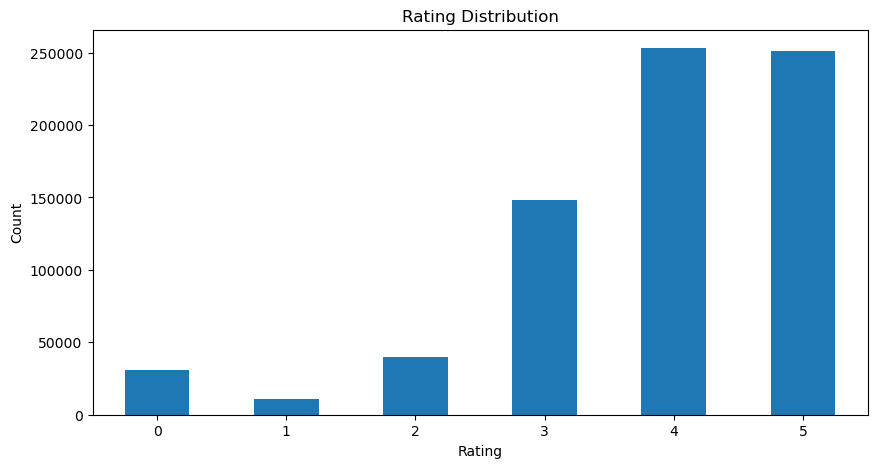

In [238]:
# Ensure all rating values from 0 to 5 are shown
rating_order = [0, 1, 2, 3, 4, 5]
rating_counts = review_df['rating'].value_counts().reindex(rating_order, fill_value=0)

rating_counts.plot(kind='bar', figsize=(10, 5))
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

## Preprocessing for Review Data

### Filtering out the users that rated less than Third Quantile --> Less Significant Information

In [240]:
user_count = review_df['user_id'].value_counts()
user_count.describe()

count    92667.000000
mean         7.927741
std         53.817815
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       5322.000000
Name: count, dtype: float64

- The result shows 75% user rated less than 4 books, based on the third quantile record (75%)
- To optimize the collaborative filtering approach, we filter out users who have rated fewer than 4 books, focusing on users whose preferences can contribute meaningfully to the recommendation system

In [242]:
cleaned_review_df = review_df[review_df['user_id'].isin(user_count[user_count > user_count.quantile(0.75)].index)]
cleaned_review_df.shape

(617607, 11)

Now, the review dataset only remains those review from the user who rated more than 4 books.

In [244]:
new_user_count = cleaned_review_df['user_id'].value_counts()
new_user_count.describe()

count    20183.000000
mean        30.600357
std        112.420922
min          5.000000
25%          6.000000
50%         10.000000
75%         21.000000
max       5322.000000
Name: count, dtype: float64

### Ignore Implicit Rating (rating 0)
- Assumption: a rating of 0 implies the user showed or read the book but didn’t rate it (implicit rating), we filter out such cases as they may not contribute significantly to collaborative filtering.

In [246]:
cleaned_review_df = cleaned_review_df[~(cleaned_review_df['rating'] == 0)]
cleaned_review_df[cleaned_review_df['rating'] == 0]

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments


### Filter out the book that has less review record 
- the book dataset has the column 'ratings_count'
- filter the book which ratings count is lesser than the third quantile of ratings count

In [250]:
# Retrieve the cleaned book
cleaned_book_df = pd.read_csv("cleaned_books_data.csv")

In [264]:
# Identify popular books - those book with rating count above third quantile
popular_books = cleaned_book_df[cleaned_book_df['ratings_count'] > cleaned_book_df['ratings_count'].quantile(0.75)]

# Filter reviews to only those books
cleaned_review_df = cleaned_review_df[cleaned_review_df['book_id'].isin(popular_books['book_id'])]

cleaned_review_df.shape

(322577, 11)

In [269]:
cleaned_review_df.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,23310161,f4b4b050f4be00e9283c92a814af2670,4,Fun sequel to the original.,Tue Nov 17 11:37:35 -0800 2015,Tue Nov 17 11:38:05 -0800 2015,NaN,NaN,7,0
1,8842281e1d1347389f2ab93d60773d4d,17290220,22d424a2b0057b18fb6ecf017af7be92,5,One of my favorite books to read to my 5 year ...,Sat Nov 08 08:54:03 -0800 2014,Wed Jan 25 13:56:12 -0800 2017,Tue Jan 24 00:00:00 -0800 2017,NaN,4,0
3,8842281e1d1347389f2ab93d60773d4d,460548,1e4de11dd4fa4b7ffa59b6c69a6b28e9,5,My daughter is loving this. Published in the 6...,Mon Dec 02 10:43:59 -0800 2013,Wed Mar 22 11:47:25 -0700 2017,NaN,NaN,5,4
4,8842281e1d1347389f2ab93d60773d4d,11474551,2065145714bf747083a1c9ce81d5c4fe,5,A friend sent me this. Hilarious!,Wed May 11 22:38:11 -0700 2011,Sun Jan 29 15:56:41 -0800 2012,Wed May 11 00:00:00 -0700 2011,Wed May 11 00:00:00 -0700 2011,5,0
13,4b3636a043e5c99fa27ac897ccfa1151,17722973,978f0a0be26c3d77a3eb3ed458d215dd,3,"I want to love these books so much, because I ...",Tue Sep 22 10:18:57 -0700 2015,Mon Sep 28 10:12:37 -0700 2015,Fri Sep 25 00:00:00 -0700 2015,Tue Sep 22 00:00:00 -0700 2015,0,0


### Check whether got duplicate review record

In [275]:
cleaned_review_df.duplicated(['user_id', 'book_id']).value_counts()

False    322577
Name: count, dtype: int64

There is no any duplicated review record

### Remain only important columns

In [280]:
cleaned_review_df.columns

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text',
       'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes',
       'n_comments'],
      dtype='object')

In [282]:
cleaned_review_df = cleaned_review_df[['user_id', 'book_id', 'review_id', 'rating']]
cleaned_review_df.head()

,user_id,book_id,review_id,rating
0,8842281e1d1347389f2ab93d60773d4d,23310161,f4b4b050f4be00e9283c92a814af2670,4
1,8842281e1d1347389f2ab93d60773d4d,17290220,22d424a2b0057b18fb6ecf017af7be92,5
3,8842281e1d1347389f2ab93d60773d4d,460548,1e4de11dd4fa4b7ffa59b6c69a6b28e9,5
4,8842281e1d1347389f2ab93d60773d4d,11474551,2065145714bf747083a1c9ce81d5c4fe,5
13,4b3636a043e5c99fa27ac897ccfa1151,17722973,978f0a0be26c3d77a3eb3ed458d215dd,3


In [286]:
cleaned_review_df.shape

(322577, 4)

### Save the cleaned data into csv file

In [288]:
cleaned_review_df.to_csv("cleaned_review_data.csv", index=False)

## Interaction Dataset Information

In [11]:
interaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10059349 entries, 0 to 10059348
Data columns (total 10 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   user_id                 object
 1   book_id                 int64 
 2   review_id               object
 3   is_read                 bool  
 4   rating                  int64 
 5   review_text_incomplete  object
 6   date_added              object
 7   date_updated            object
 8   read_at                 object
 9   started_at              object
dtypes: bool(1), int64(2), object(7)
memory usage: 700.3+ MB


In [13]:
interaction_df.isnull().sum()

user_id                         0
book_id                         0
review_id                       0
is_read                         0
rating                          0
review_text_incomplete    9322671
date_added                      0
date_updated                    0
read_at                   8174589
started_at                9071761
dtype: int64

is_read
True     6626989
False    3432360
Name: count, dtype: int64


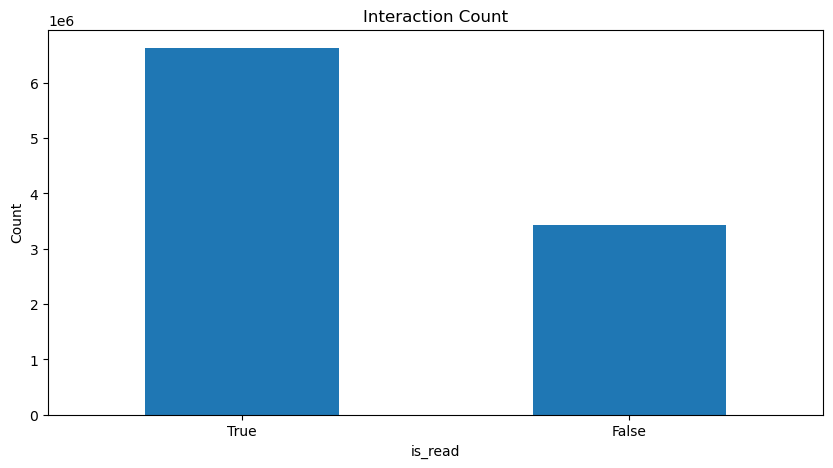

In [385]:
print(interaction_df['is_read'].value_counts())

# Plot the graph
interaction_df['is_read'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title("Interaction Count")
plt.xlabel("is_read")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Content-based Filtering

In [789]:
try:
    cleaned_book_df = pd.read_csv("cleaned_books_data.csv")
    print(f"Dataset loaded successfully, rows: {len(cleaned_book_df)}")
except FileNotFoundError:
    print("Error: 'cleaned_books_data.csv' not found, please check the file path.")
    exit()

cleaned_book_df.head()

Dataset loaded successfully, rows: 77168


,text_reviews_count,language_code,popular_shelves,average_rating,similar_books,description,authors,publisher,book_id,ratings_count,title,content
0,23,eng,transitional-chapter,3.92,"['570401', '6265092', '4082037', '834495', '21...",whod thought mind reading could pain mean expe...,dan_greenburg,grosset_&_dunlap,1162741,218,zap!_i'm_a_mind_reader,zap!_i'm_a_mind_reader whod thought mind readi...
1,23,eng,childrens fiction humor mystery children-s chi...,4.04,"['108901', '13642532', '225547', '793012', '11...",hank accused murder fit despair hank resigns p...,john_r._erickson,puffin,817079,127,the_original_adventures_of_hank_the_cowdog_(ha...,the_original_adventures_of_hank_the_cowdog_(ha...
2,20,eng,horses horse-books historical-fiction,4.12,"['7819076', '1355993', '1585431', '398328', '6...",nineyearold lara daughter rithe leader cattler...,kathleen_duey,puffin,532856,254,lara_and_the_gray_mare_(hoofbeats:_lara_and_th...,lara_and_the_gray_mare_(hoofbeats:_lara_and_th...
3,3,eng,NaN,3.44,[],gunny sack man book gets kids excited chores i...,holly_s._remkes,read_it_again!_publishing,6413991,8,the_gunny_sack_man,the_gunny_sack_man gunny sack man book gets ki...
4,5,eng,fantasy childrens fiction animals classics chi...,4.17,"['1379250', '1042367', '916413', '1414244', '2...",whoever heard witchs cat bright blue eyes one ...,ursula_moray_williams,(penguin_group)_puffin_books,23371451,19,"gobbolino,_the_witch's_cat","gobbolino,_the_witch's_cat whoever heard witch..."


In [827]:
# Create title-to-index mapping
indices = pd.Series(cleaned_book_df.index, index=cleaned_book_df['title']).drop_duplicates(keep='first')
print(f"Indices sample: {indices.head()}")

# Mappings
book_id_to_index = pd.Series(cleaned_book_df.index, index=cleaned_book_df['book_id']).drop_duplicates(keep='first')
index_to_book_id = pd.Series(cleaned_book_df['book_id'].values, index=cleaned_book_df.index)

Indices sample: title
zap!_i'm_a_mind_reader                                              0
the_original_adventures_of_hank_the_cowdog_(hank_the_cowdog,_#1)    1
lara_and_the_gray_mare_(hoofbeats:_lara_and_the_gray_mare,_#1)      2
the_gunny_sack_man                                                  3
gobbolino,_the_witch's_cat                                          4
dtype: int64


## TF-IDF Vectorizer

In [791]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

In [793]:
# Build TF-IDF model
tfidf = TfidfVectorizer(stop_words='english', max_features=500, min_df=5)
tfidf_matrix = tfidf.fit_transform(cleaned_book_df['content'])
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")
print(f"TF-IDF matrix memory usage: {tfidf_matrix.data.nbytes / 1e6:.2f} MB")

TF-IDF matrix shape: (77168, 500)
TF-IDF matrix memory usage: 13.71 MB


In [794]:
# Build NearestNeighbors model
nn = NearestNeighbors(n_neighbors=11, metric='cosine', algorithm='brute', n_jobs=-1)  # 11 to account for self
nn.fit(tfidf_matrix)
print("NearestNeighbors model fitted successfully")

NearestNeighbors model fitted successfully


In [879]:
# Recommendation function
def recommend_books(title, nn_model=nn, top_n=10):
    print(f"Recommending for title: {title}")
    
    # Check if title exists
    if title not in indices:
        print(f"Title '{title}' not in dataset.")
        return None
    
    # Get index
    idx = indices[title]
    print(f"Index for title '{title}': {idx}")
    
    # Ensure idx is an integer
    if isinstance(idx, (int, np.integer)):
        idx = idx
    else:
        idx = idx[0]  # Take first if multiple
    
    # Get nearest neighbors
    distances, book_indices = nn_model.kneighbors(tfidf_matrix[idx], n_neighbors=top_n + 1)
    book_indices = book_indices.flatten()[1:]  # Exclude self
    recommended_book_ids = index_to_book_id.iloc[book_indices].values
    distances = distances.flatten()[1:]  # Exclude self
    similarities = 1 - distances  # Convert distance to similarity
    
    # Return results
    result = cleaned_book_df.iloc[book_indices][['book_id', 'title','description']].copy()
    result['similarity_score'] = similarities
    return result, recommended_book_ids

In [881]:
title = "the_original_adventures_of_hank_the_cowdog_(hank_the_cowdog,_#1)".lower()
recommendations, id = recommend_books(title)
if recommendations is None:
    print("Recommendation result is None, please check debug information.")
else:
    print("Recommendation results:")
    print(recommendations)

Recommending for title: the_original_adventures_of_hank_the_cowdog_(hank_the_cowdog,_#1)
Index for title 'the_original_adventures_of_hank_the_cowdog_(hank_the_cowdog,_#1)': 1
Recommendation results:
        book_id                                              title  \
66379    180584  the_original_adventures_of_hank_the_cowdog_(ha...   
75644   2622917         the_original_adventures_of_hank_the_cowdog   
73885   4445705  the_original_adventures_of_hank_the_cowdog,_vo...   
75911   9403054  the_original_adventures_of_hank_the_cowdog_(ha...   
1368     156884           mike's_mystery_(the_boxcar_children,_#5)   
1593     156810     schoolhouse_mystery_(the_boxcar_children,_#10)   
56400   1165509  lost_treasure_of_the_emerald_eye_(geronimo_sti...   
1478     363270   the_lighthouse_mystery_(the_boxcar_children,_#8)   
1520   13566393                               the_woodshed_mystery   
64621  10465534                        door_in_the_dragon's_throat   

                              

### Evaluation Metrices

In [835]:
# Parse similar_books
def parse_similar_books(similar_books):
    try:
        if isinstance(similar_books, str):
            return ast.literal_eval(similar_books)
        return similar_books
    except (ValueError, SyntaxError):
        return []

cleaned_book_df['similar_books'] = cleaned_book_df['similar_books'].apply(parse_similar_books)

In [938]:
# Function to calculate precision@K for a specific book
def precision_at_k(title, df, nn_model, k=10):
    recommendations, recommended_book_ids = recommend_books(title, nn_model, top_n=k)
    if recommendations is None:
        print(f"Title '{title}' not found in the dataset.")
        return None
    idx = indices[title]
    ground_truth = set(df.loc[idx, 'similar_books'])
    recommended_set = set(recommended_book_ids)
    intersection = recommended_set.intersection(ground_truth)
    precision = len(intersection) / k
    return precision, intersection, ground_truth, recommended_set, recommendations

In [940]:
title = "the_original_adventures_of_hank_the_cowdog_(hank_the_cowdog,_#1)"
result = precision_at_k(title, cleaned_book_df, nn, k=10)
if result:
    precision, intersection, ground_truth, recommended_set, recommendations = result
    print(f"\nPrecision@10 for '{title}': {precision:.4f}")
    print("Recommendations:")
    print(recommendations[['book_id', 'title', 'similarity_score']])
    print(f"\nGround truth similar_books: {ground_truth}")
    print(f"Recommended book_ids: {recommended_set}")
    print(f"Intersection (correct matches): {intersection}")

Recommending for title: the_original_adventures_of_hank_the_cowdog_(hank_the_cowdog,_#1)
Index for title 'the_original_adventures_of_hank_the_cowdog_(hank_the_cowdog,_#1)': 1

Precision@10 for 'the_original_adventures_of_hank_the_cowdog_(hank_the_cowdog,_#1)': 0.0000
Recommendations:
        book_id                                              title  \
66379    180584  the_original_adventures_of_hank_the_cowdog_(ha...   
75644   2622917         the_original_adventures_of_hank_the_cowdog   
73885   4445705  the_original_adventures_of_hank_the_cowdog,_vo...   
75911   9403054  the_original_adventures_of_hank_the_cowdog_(ha...   
1368     156884           mike's_mystery_(the_boxcar_children,_#5)   
1593     156810     schoolhouse_mystery_(the_boxcar_children,_#10)   
56400   1165509  lost_treasure_of_the_emerald_eye_(geronimo_sti...   
1478     363270   the_lighthouse_mystery_(the_boxcar_children,_#8)   
1520   13566393                               the_woodshed_mystery   
64621  10465534

## Bert Embeddings

In [811]:
from sentence_transformers import SentenceTransformer

In [813]:
# Load BERT model
# this model offers good quality with a faster time
bert_model = SentenceTransformer('all-MiniLM-L6-v2') 

# Generate embeddings for combined features
bert_embeddings = bert_model.encode(cleaned_book_df['content'].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/2412 [00:00<?, ?it/s]

In [931]:
from sklearn.neighbors import NearestNeighbors

In [933]:
# === Fit NearestNeighbors ===
bert_nn_model = NearestNeighbors(n_neighbors=11, metric='cosine', algorithm='brute')
bert_nn_model.fit(bert_embeddings)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=11)

In [901]:
# Keyword-based recommendation using BERT
def recommend_books_bert(query, top_n=10):
    query_embedding = bert_model.encode([query])
    distances, book_indices = bert_nn_model.kneighbors(query_embedding, n_neighbors=top_n + 1)
    book_indices = book_indices.flatten()  
    recommended_book_ids = index_to_book_id.iloc[book_indices].values
    distances = distances.flatten()  
    similarities = 1 - distances  # Convert distance to similarity
    
    # Return results
    result = cleaned_book_df.iloc[book_indices][['book_id', 'title','description']].copy()
    result['similarity_score'] = similarities
    return result, recommended_book_ids

In [903]:
results, id = recommend_books_bert("the_original_adventures_of_hank_the_cowdog_(hank_the_cowdog,_#1)")
print(results)

        book_id                                              title  \
66044    180590  the_case_of_the_one-eyed_killer_stud_horse_(ha...   
1        817079  the_original_adventures_of_hank_the_cowdog_(ha...   
66379    180584  the_original_adventures_of_hank_the_cowdog_(ha...   
8121    1457771  the_case_of_the_car-barkaholic_dog_(hank_the_c...   
75911   9403054  the_original_adventures_of_hank_the_cowdog_(ha...   
66046    195421  the_case_of_the_hooking_bull_(hank_the_cowdog,...   
48091   3023362  the_quest_for_the_great_white_quail_(hank_the_...   
66034    180593            it's_a_dog's_life_(hank_the_cowdog,_#3)   
48207    180586  the_further_adventures_of_hank_the_cowdog_(han...   
47857    195447  the_case_of_the_booby-trapped_pickup_(hank_the...   
72970  14462013  hank_the_cowdog_and_monkey_business_(hank_the_...   

                                             description  similarity_score  
66044  hank cowdog goes rescue wild oneeyed horse cre...          0.753774  
1    

### Evaluation

In [905]:
# Function to calculate precision@K for a specific book
def precision_at_k_bert(title, df, nn_model, k=10):
    recommendations, recommended_book_ids = recommend_books_bert(title, top_n=k)
    if recommendations is None:
        print(f"Title '{title}' not found in the dataset.")
        return None
    idx = indices[title]
    ground_truth = set(df.loc[idx, 'similar_books'])
    recommended_set = set(recommended_book_ids)
    intersection = recommended_set.intersection(ground_truth)
    precision = len(intersection) / k
    return precision, intersection, ground_truth, recommended_set, recommendations

In [907]:
title = "the_original_adventures_of_hank_the_cowdog_(hank_the_cowdog,_#1)"
result = precision_at_k_bert(title, cleaned_book_df, nn, k=10)
if result:
    precision, intersection, ground_truth, recommended_set, recommendations = result
    print(f"\nPrecision@10 for '{title}': {precision:.4f}")
    print("Recommendations:")
    print(recommendations[['book_id', 'title']])
    print(f"\nGround truth similar_books: {ground_truth}")
    print(f"Recommended book_ids: {recommended_set}")
    print(f"Intersection (correct matches): {intersection}")


Precision@10 for 'the_original_adventures_of_hank_the_cowdog_(hank_the_cowdog,_#1)': 0.0000
Recommendations:
        book_id                                              title
66044    180590  the_case_of_the_one-eyed_killer_stud_horse_(ha...
1        817079  the_original_adventures_of_hank_the_cowdog_(ha...
66379    180584  the_original_adventures_of_hank_the_cowdog_(ha...
8121    1457771  the_case_of_the_car-barkaholic_dog_(hank_the_c...
75911   9403054  the_original_adventures_of_hank_the_cowdog_(ha...
66046    195421  the_case_of_the_hooking_bull_(hank_the_cowdog,...
48091   3023362  the_quest_for_the_great_white_quail_(hank_the_...
66034    180593            it's_a_dog's_life_(hank_the_cowdog,_#3)
48207    180586  the_further_adventures_of_hank_the_cowdog_(han...
47857    195447  the_case_of_the_booby-trapped_pickup_(hank_the...
72970  14462013  hank_the_cowdog_and_monkey_business_(hank_the_...

Ground truth similar_books: {'108901', '352322', '706053', '341801', '479229', '11655

## Content-based RS Finalize

- Based on the evaluation technique carried out on the two method, we found that both methods are unable to recommender the books that are mentionel at the similiar book column at the original dataset. 
- However, by looking into the result generated, the similarity score generated by bert embeddings is more higher
- This may because of the ability of Bert, which will consider the semantic meaning or context of the words

In [948]:
def content_based_recommendation(query, nn_model=bert_nn_model, n_books=10):
    query_embedding = bert_model.encode([query])
    distances, book_indices = bert_nn_model.kneighbors(query_embedding, n_neighbors=n_books + 1)
    book_indices = book_indices.flatten()  
    distances = distances.flatten()  
    similarities = 1 - distances  # Convert distance to similarity
    
    # Return results
    result = cleaned_book_df.iloc[book_indices][['book_id', 'title','description']].copy()
    result['similarity_score'] = similarities
    return result

In [1049]:
# === Save for Streamlit Use ===
with open('bert_model.pkl', 'wb') as f:
    pickle.dump(bert_model, f)

with open('bert_embeddings.pkl', 'wb') as f:
    pickle.dump(bert_embeddings, f)

with open('bert_nn_model.pkl', 'wb') as f:
    pickle.dump(bert_nn_model, f)

# Collaborative Filtering

In [1110]:
cleaned_review_df = pd.read_csv("cleaned_review_data.csv")
cleaned_review_df.head()

,user_id,book_id,review_id,rating
0,8842281e1d1347389f2ab93d60773d4d,23310161,f4b4b050f4be00e9283c92a814af2670,4
1,8842281e1d1347389f2ab93d60773d4d,17290220,22d424a2b0057b18fb6ecf017af7be92,5
2,8842281e1d1347389f2ab93d60773d4d,460548,1e4de11dd4fa4b7ffa59b6c69a6b28e9,5
3,8842281e1d1347389f2ab93d60773d4d,11474551,2065145714bf747083a1c9ce81d5c4fe,5
4,4b3636a043e5c99fa27ac897ccfa1151,17722973,978f0a0be26c3d77a3eb3ed458d215dd,3


## Memory-based Collaborative Filtering

In [1108]:
# KNN model
from sklearn.neighbors import NearestNeighbors

from collections import defaultdict
from sklearn.metrics import mean_squared_error
from math import sqrt

### Train-test split

In [1112]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(cleaned_review_df, test_size=0.20)

In [1114]:
print(f'Training set lengths: {len(train_data)}')
print(f'Testing set lengths: {len(test_data)}')
print(f'Test set is {(len(test_data)/(len(train_data)+len(test_data))*100):.0f}% of the full dataset.')

Training set lengths: 258061
Testing set lengths: 64516
Test set is 20% of the full dataset.


In [1116]:
# Get int mapping for user_id in train dataset
u_unique_train = train_data.user_id.unique()  
train_user2idx = {o:i for i, o in enumerate(u_unique_train)}

# Get int mapping for isbn in train dataset
b_unique_train = train_data.book_id.unique()  
train_book2idx = {o:i for i, o in enumerate(b_unique_train)}

In [1118]:
# Get int mapping for user_id in test dataset
u_unique_test = test_data.user_id.unique()  
test_user2idx = {o:i for i, o in enumerate(u_unique_test)}

# Get int mapping for isbn in test dataset
b_unique_test = test_data.book_id.unique() 
test_book2idx = {o:i for i, o in enumerate(b_unique_test)}

In [1120]:
# training set
train_data['u_unique'] = train_data['user_id'].map(train_user2idx)
train_data['b_unique'] = train_data['book_id'].map(train_book2idx)

# testing set
test_data['u_unique'] = test_data['user_id'].map(test_user2idx)
test_data['b_unique'] = test_data['book_id'].map(test_book2idx)

In [1122]:
train_data.head()

,user_id,book_id,review_id,rating,u_unique,b_unique
191271,21bad8e31544fb66446322a268132c35,378,10b18cb5d701d4896b7d0584012d15f2,3,0,0
270230,4a1e0c01a1f3eef9a4610e91f1b61915,13358131,32fa877b2b1d8e00d6931345ce6ef852,4,1,1
92784,7c878621358876e293dc216faa12ac87,42449,c9c4d6832de94239b3d7408b01619729,4,2,2
264358,439bce521e3521a7e3073a09402d4cb3,6013967,a5d50c5e30e8321576779b067ccabeea,3,3,3
228459,6a16d32f31f2ca68ed81320c0715c201,17071967,2525f3cd2a288aeac1a4f1f786c06b38,5,4,4


In [1124]:
test_data.head()

,user_id,book_id,review_id,rating,u_unique,b_unique
320894,75d5d619e25ce2eaed4cac58c2a60481,16100983,7afa0581e600e6197910143cd88c99ce,5,0,0
241560,d4cc9a0c6fbf2f6dd13fe39ce0640ac9,65112,bcc61da5e4b7fdb2c28155e15267a503,5,1,1
223252,3b6d553d8b401f108264f4b90a5387e1,17347652,8675dd2da12422fa5ad6313752e1415a,4,2,2
148212,a972edfeea15a3ccd5835709742e5043,6693,c9d5078c21594caf74e766d225c06132,3,3,3
138377,741e2e8c0c8214fa7dbffcfe0be1cf48,5,30a13c3edaffc63bd5097c3e2b68280b,4,4,4


In [1162]:
# Create user-item matrices - train & test
from scipy.sparse import csr_matrix

# User-item for train data
train_matrix = csr_matrix((train_data['rating'], (train_data['u_unique'], train_data['b_unique'])),
                        shape=(len(train_user2idx), len(train_book2idx)))

# User-item for test data
test_matrix = csr_matrix((test_data['rating'], (test_data['u_unique'], test_data['b_unique'])),
                        shape=(len(test_user2idx), len(test_book2idx)))

### User-item matrices

In [952]:
# The complete user-item matrices
user_to_idx = {user: idx for idx, user in enumerate(cleaned_review_df['user_id'].unique())}
book_to_idx = {book: idx for idx, book in enumerate(cleaned_review_df['book_id'].unique())}

# Create sparse matrix
rows = cleaned_review_df['user_id'].map(user_to_idx)
cols = cleaned_review_df['book_id'].map(book_to_idx)
values = cleaned_review_df['rating']

sparse_matrix = csr_matrix((values, (rows, cols)), 
                        shape=(len(user_to_idx), len(book_to_idx)))

In [954]:
user_item_matrix = cleaned_review_df.pivot_table(index='user_id', columns='book_id', values='rating').fillna(0)

In [663]:
user_item_matrix

book_id,5,50,61,236,241,330,378,903,1166,1167,...,34525564,34608694,34659575,34740357,34828626,34875703,35046052,35231499,35280748,35905318
user_id,,,,,,,,,,,,,,,,,,,,,
000157a6f8331e9c9a21252e1fee91d1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000192962b87d560f00b06fdcbd71681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0006a5b8cda1ba6d7b911dc575f6547b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000a9539c044b397780166167b1327b3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0019de4561419b7543238e0979f2f33e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffefaa26fa788acacf550a7e047e2370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fff7a970250f2f8760ff3a40069e8a5e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffc34d137f5c5c5e1ca1d6f325a4dcf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### User-Based

In [955]:
# Fit the model
user_knn = NearestNeighbors(n_neighbors=6, metric='cosine', algorithm='brute')
user_knn.fit(csr_matrix(user_item_matrix.values))

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=6)

In [679]:
def get_top_similar_users_knn(target_user_id, user_item_df):
    user_ids = user_item_df.index
    # Convert to sparse 
    user_item_matrix = csr_matrix(user_item_df.values)
    
    target_idx = user_ids.get_loc(target_user_id)
    distances, indices = user_knn.kneighbors(user_item_matrix[target_idx])
    
    # Return similar users (excluding the target user themselves)
    similar_users = user_ids[indices.flatten()[1:]]
    similarities = 1 - distances.flatten()[1:]  # Convert distances to similarities
    return pd.Series(similarities, index=similar_users)

def user_based_recommendations(target_user_id, user_item_matrix, n_books=5):
    # Get similar users
    similar_users = get_top_similar_users_knn(target_user_id, user_item_matrix)

    # Get books rated by similar users but not by target user
    target_books = set(cleaned_review_df[cleaned_review_df['user_id'] == target_user_id]['book_id'])
    similar_users_books = cleaned_review_df[cleaned_review_df['user_id'].isin(similar_users.index)]

    # Filter out books already rated by target user
    candidate_books = similar_users_books[~similar_users_books['book_id'].isin(target_books)]
    
    # Calculate weighted ratings based on user similarity
    candidate_books = candidate_books.copy()
    candidate_books['weighted_rating'] = candidate_books.apply(
        lambda x: x['rating'] * similar_users[x['user_id']], axis=1
    )

    # Get top rated books with weighted average
    book_scores = candidate_books.groupby('book_id').agg({
        'weighted_rating': 'sum',
        'user_id': 'count',
        'rating': 'mean'
    })

    # Normalize the weighted ratings by dividing by sum of similarities
    book_scores['similarity_sum'] = book_scores['user_id'].apply(
        lambda count: sum([similar_users[user] for user in 
                          candidate_books[candidate_books['book_id'] == book_scores.index[book_scores['user_id'] == count].values[0]]['user_id']])
    )
    
    book_scores['normalized_score'] = book_scores['weighted_rating'] / book_scores['similarity_sum']

    # Sort and get top books
    top_books = book_scores.sort_values('normalized_score', ascending=False).head(n_books)
    top_books = top_books.reset_index()
    
    # Merge with book titles
    top_books_with_titles = pd.merge(top_books, book_df[['book_id', 'title']], on='book_id', how='left')
    
    return top_books_with_titles[['book_id', 'title', 'normalized_score', 'rating', 'user_id']]

In [681]:
# Test the recommendation:
result = user_based_recommendations('8842281e1d1347389f2ab93d60773d4d', user_item_matrix, 10)
print(result)

   book_id                                      title  normalized_score  \
0  7938371    The Capture (Guardians of Ga'Hoole, #1)          2.473863   
1   842068  The Best Halloween Ever (The Herdmans #3)          1.000000   

   rating  user_id  
0     3.0        1  
1     1.0        1  


In [956]:
# === Save for Streamlit Use ===
with open('user_knn_model.pkl', 'wb') as f:
    pickle.dump(user_knn, f)

with open('user_item_matrix.pkl', 'wb') as f:
    pickle.dump(user_item_matrix, f)

with open('user_to_idx.pkl', 'wb') as f:
    pickle.dump(user_to_idx, f)

with open('book_to_idx.pkl', 'wb') as f:
    pickle.dump(book_to_idx, f)

#### Evaluation Metric Test

In [1192]:
# Fit the model
train_user_knn = NearestNeighbors(n_neighbors=6, metric='cosine', algorithm='brute')
train_user_knn.fit(train_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=6)

In [1194]:
def user_based_predict(user_idx, item_idx, train_matrix, train_user_knn):
    distances, indices = train_user_knn.kneighbors(train_matrix[user_idx].reshape(1, -1))
    sim_scores = 1 - distances.flatten()
    neighbor_ratings = train_matrix[indices.flatten(), item_idx].toarray().flatten()

    mask = neighbor_ratings > 0
    if mask.sum() == 0:
        return 0
    weighted_sum = np.dot(sim_scores[mask], neighbor_ratings[mask])
    return weighted_sum / sim_scores[mask].sum()

In [1196]:
# Evaluate the user-based model
predictions = []
ground_truths = []

for _, row in test_data.iterrows():
    user_id = row['user_id']
    book_id = row['book_id']
    rating = row['rating']
    
    if user_id in train_user2idx and book_id in train_book2idx:
        u_idx = train_user2idx[user_id]
        b_idx = train_book2idx[book_id]
        pred_rating = user_based_predict(u_idx, b_idx, train_matrix, train_user_knn)
        if not np.isnan(pred_rating):
            predictions.append(pred_rating)
            ground_truths.append(rating)

if predictions:
    model_rmse = sqrt(mean_squared_error(ground_truths, predictions))
    print(f"User-Based Collaborative Filtering RMSE: {model_rmse:.4f}")

User-Based Collaborative Filtering RMSE: 3.6928


### Item-Based

In [960]:
# Transpose the user-item matrice
item_item_df = user_item_matrix.T

# Train the model
item_knn = NearestNeighbors(n_neighbors=6, metric='cosine', algorithm='brute')
item_knn.fit(item_item_df)

item_similarities, item_indices = item_knn.kneighbors(item_item_df)
item_similarities = 1 - item_similarities  # Convert distance to similarity

In [687]:
def item_based_recommendations(target_user_id, user_item_matrix, n_books=5):
    # Get books rated by the target user
    target_books = cleaned_review_df[cleaned_review_df['user_id'] == target_user_id]['book_id'].values
    
    if len(target_books) == 0:
        return pd.DataFrame()  # Handle cold-start

    # Map book_id to matrix index
    book_to_idx = {book_id: idx for idx, book_id in enumerate(user_item_matrix.columns)}
    
    # For each book rated by the user, find similar books
    candidate_scores = defaultdict(float)
    for book_id in target_books:
        if book_id not in book_to_idx:
            continue
        book_idx = book_to_idx[book_id]
        similar_indices = item_indices[book_idx][1:]  # Exclude self
        similar_scores = item_similarities[book_idx][1:]
        
        # Aggregate scores across all similar items
        for sim_idx, sim_score in zip(similar_indices, similar_scores):
            similar_book_id = user_item_matrix.columns[sim_idx]
            candidate_scores[similar_book_id] += sim_score
    
    # Filter out books already rated by the user
    candidate_scores = {
        book_id: score for book_id, score in candidate_scores.items()
        if book_id not in target_books
    }
    
    # Sort and get top books
    top_books = sorted(candidate_scores.items(), key=lambda x: x[1], reverse=True)[:n_books]
    top_books = pd.DataFrame(top_books, columns=['book_id', 'item_score'])
    
    # Merge with book titles
    top_books = pd.merge(top_books, book_df[['book_id', 'title']], on='book_id', how='left')
    return top_books

In [689]:
# Test the recommendation:
result = item_based_recommendations('8842281e1d1347389f2ab93d60773d4d', user_item_matrix)
print(result)

    book_id  item_score                       title
0  16101018    0.365365    The Day the Crayons Quit
1   1969280    0.266794        Iggy Peck, Architect
2  23309640    0.256694                       Float
3  17471114    0.250069                     Sparky!
4  22521973    0.249817  Last Stop on Market Street


In [961]:
# === Save for Streamlit Use ===
with open('item_knn_model.pkl', 'wb') as f:
    pickle.dump(item_knn, f)

with open('item_item_matrix.pkl', 'wb') as f:
    pickle.dump(item_item_df, f)

with open('item_similarities.pkl', 'wb') as f:
    pickle.dump(item_similarities, f)

with open('item_indices.pkl', 'wb') as f:
    pickle.dump(item_indices, f)

#### Evaluation Metric Test

In [1176]:
# Transpose the user-item matrice
t_item_item_df = train_matrix.T

# Train the model
t_item_knn = NearestNeighbors(n_neighbors=6, metric='cosine', algorithm='brute')
t_item_knn.fit(t_item_item_df)

item_similarities, item_indices = t_item_knn.kneighbors(t_item_item_df)
item_similarities = 1 - item_similarities  # Convert distance to similarity

def item_based_predict(user_idx, item_idx, train_matrix, item_similarities, item_indices):
    user_ratings = train_matrix[user_idx].toarray().flatten()

    similar_items = item_indices[item_idx][1:]  # skip itself
    sim_scores = item_similarities[item_idx][1:]

    neighbor_ratings = user_ratings[similar_items]

    mask = neighbor_ratings > 0
    if mask.sum() == 0:
        return 0
    weighted_sum = np.dot(sim_scores[mask], neighbor_ratings[mask])
    return weighted_sum / sim_scores[mask].sum()

In [1198]:
# Evaluate the user-based model
predictions = []
ground_truths = []

for _, row in test_data.iterrows():
    user_id = row['user_id']
    book_id = row['book_id']
    rating = row['rating']
    
    if user_id in train_user2idx and book_id in train_book2idx:
        u_idx = train_user2idx[user_id]
        b_idx = train_book2idx[book_id]
        pred_rating = item_based_predict(u_idx, b_idx, train_matrix, item_similarities, item_indices)
        if not np.isnan(pred_rating):
            predictions.append(pred_rating)
            ground_truths.append(rating)

if predictions:
    model_rmse = sqrt(mean_squared_error(ground_truths, predictions))
    print(f"Item-Based Collaborative Filtering RMSE: {model_rmse:.4f}")

Item-Based Collaborative Filtering RMSE: 3.6760


## Model-based Collaborative Filtering - SVD

In [963]:
# SVD
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

In [964]:
# Prepare for Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(cleaned_review_df[['user_id', 'book_id', 'rating']], reader)

# Surprise train/test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train SVD
svd_model = SVD()
svd_model.fit(trainset)

# Predict on Test Set
predictions = svd_model.test(testset)

# Evaluate RMSE
rmse = accuracy.rmse(predictions)

RMSE: 0.8268


In [768]:
"""Get book recommendations using Surprise SVD """
def model_based_recommendations(target_user_id, svd_model, user_item_matrix, n_books=5):
    # Find all book ids
    all_book_ids = book_df['book_id'].unique()
    
    # Get the books that user has already rated
    rated_books = user_item_matrix.columns[user_item_matrix.loc[target_user_id] > 0]

    # Candidate books = books not yet rated
    candidate_books = [book_id for book_id in all_book_ids if book_id not in rated_books]

    predictions = []
    for book_id in candidate_books:
        try:
            pred_rating = svd_model.predict(target_user_id, book_id).est
            predictions.append((book_id, pred_rating))
        except:
            continue  # Ignore errors

    # Sort predictions
    top_books = sorted(predictions, key=lambda x: x[1], reverse=True)[:n_books]
    top_book_ids = [book_id for book_id, _ in top_books]
    top_predicted_ratings = [pred for _, pred in top_books]

    # Create DataFrame for results
    results = pd.DataFrame({
        'book_id': top_book_ids,
        'predicted_rating': top_predicted_ratings
    })

    # Merge with titles
    results = pd.merge(results, book_df[['book_id', 'title']], on='book_id', how='left')

    return results

In [769]:
result = model_based_recommendations("000157a6f8331e9c9a21252e1fee91d1", svd_model, user_item_matrix)
print(result)

    book_id  predicted_rating                                            title
0  17262290          5.000000                    Journey (Journey Trilogy, #1)
1  15815945          5.000000                                           Wonder
2    334818          4.938552                                    Miss Rumphius
3    814060          4.905044  Anne of Green Gables (Anne of Green Gables, #1)
4     63322          4.872551                             The Big Orange Splot


In [966]:
# Save model
with open('svd_model.pkl', 'wb') as f:
    pickle.dump(svd_model, f)

## Combine the three model for the Collaborative Filtering

In [980]:
"""Get book recommendations using a hybrid approach"""
def collaborative_recommendations(target_user_id, user_item_matrix, cleaned_review_df, book_df, 
                          svd_model, alpha=0.4, beta=0.3, gamma=0.3, n_books=10):
    """
    Combine user-based, item-based, and model-based recommendations.
    Weights:
    - alpha: user-based
    - beta: item-based
    - gamma: model-based (alpha + beta + gamma = 1)
    """
    # Get recommendations from all three methods
    user_recs = user_based_recommendations(target_user_id, user_item_matrix, n_books*3)
    item_recs = item_based_recommendations(target_user_id, user_item_matrix, n_books*3)
    model_recs = model_based_recommendations(target_user_id, svd_model, user_item_matrix, n_books*3)
    
    # Normalize scores to [0, 1] for fair comparison
    def normalize_scores(df, score_col):
        min_score = df[score_col].min()
        max_score = df[score_col].max()
        df[score_col] = (df[score_col] - min_score) / (max_score - min_score + 1e-10)
        return df
    
    user_recs = normalize_scores(user_recs, 'normalized_score')
    item_recs = normalize_scores(item_recs, 'item_score')
    model_recs = normalize_scores(model_recs, 'predicted_rating')
    
    # Create dictionaries for easy lookup
    user_scores = dict(zip(user_recs['book_id'], user_recs['normalized_score']))
    item_scores = dict(zip(item_recs['book_id'], item_recs['item_score']))
    model_scores = dict(zip(model_recs['book_id'], model_recs['predicted_rating']))
    
    # Combine scores from all methods
    all_books = set(user_scores.keys()) | set(item_scores.keys()) | set(model_scores.keys())
    hybrid_scores = {}
    
    for book_id in all_books:
        hybrid_scores[book_id] = (
            alpha * user_scores.get(book_id, 0) +
            beta * item_scores.get(book_id, 0) +
            gamma * model_scores.get(book_id, 0)
        )
    
    # Sort and return top books
    top_books = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)[:n_books]
    results = pd.DataFrame(top_books, columns=['book_id', 'hybrid_score'])
    
    # Add component scores for debugging/analysis
    results['user_score'] = results['book_id'].map(user_scores).fillna(0)
    results['item_score'] = results['book_id'].map(item_scores).fillna(0)
    results['model_score'] = results['book_id'].map(model_scores).fillna(0)
    
    # Merge with book titles
    results = pd.merge(results, book_df[['book_id', 'title']], on='book_id', how='left')
    return results

In [982]:
print("\n=== Book Recommendation System ===")
print("This system uses **Collaborative filtering** to recommend books.")

while True:
    print("\nAvailable user IDs:", list(user_item_matrix.index)[:5], "... (and more)")
    target_user = input("Enter user ID to get book recommendations (Q to quit): ").strip()
    
    if target_user.lower() == 'q':
        break

    if target_user not in user_item_matrix.index:
        print(f"Error: User '{target_user}' not found")
        continue

    try:
        n_books = int(input("How many book recommendations? (Default 5): ") or 5)
        
    except ValueError:
        print("Invalid input. Using default values.")
        n_books, alpha = 5, 0.5

    recommendations = collaborative_recommendations(
        target_user, user_item_matrix, cleaned_review_df, book_df, 
        svd_model, n_books=n_books
    )
    print(f"\nTop {n_books} book recommendations for user {target_user} (collaborative):")
    print(recommendations[['title', 'hybrid_score', 'user_score', 'model_score']])

    if input("\nFind more recommendations? (y/n): ").lower() != 'y':
        break

print("\nProgram ended.")


=== Book Recommendation System ===
This system uses **Collaborative filtering** to recommend books.

Available user IDs: ['000157a6f8331e9c9a21252e1fee91d1', '000192962b87d560f00b06fdcbd71681', '0006a5b8cda1ba6d7b911dc575f6547b', '000a9539c044b397780166167b1327b3', '0019de4561419b7543238e0979f2f33e'] ... (and more)


Enter user ID to get book recommendations (Q to quit):  000157a6f8331e9c9a21252e1fee91d1
How many book recommendations? (Default 5):  5



Top 5 book recommendations for user 000157a6f8331e9c9a21252e1fee91d1 (collaborative):
                                               title  hybrid_score  \
0                                         Nutcracker      0.400000   
1                                  The Snow Merchant      0.338956   
2                          James and the Giant Peach      0.300000   
3                                             Wonder      0.300000   
4  Charlie and the Great Glass Elevator (Charlie ...      0.198420   

   user_score  model_score  
0     1.00000          0.0  
1     0.84739          0.0  
2     0.00000          0.0  
3     0.00000          1.0  
4     0.00000          0.0  



Find more recommendations? (y/n):  n



Program ended.


# Hybrid-based Recommender System (Content-Based + Collaborative)

In [1000]:
def hybrid_recommender(target_user_id, search_query, user_item_matrix, svd_model, n_recommendations=5, alpha=0.4, beta=0.3, gamma=0.3):
    # Content-based candidates
    candidate_books = content_based_recommendation(search_query, nn_model=bert_nn_model, n_books=50)
    if candidate_books.empty:
        print(f"No candidates found for query '{search_query}'")
        return pd.DataFrame()
    
    candidate_book_ids = candidate_books['book_id'].tolist()

    # Collaborative filtering scoring
    if target_user_id not in user_item_matrix.index:
        # New user --> cannot use collaborative, return content-based only
        print(f"User {target_user_id} not found in collaborative matrix. Returning content-based results.")
        return candidate_books[['book_id', 'title', 'similarity_score']].head(n_recommendations)
    
    # --- User-based Recommendations ---
    user_recs = user_based_recommendations(target_user_id, user_item_matrix, n_books=n_recommendations*2)
    user_recs = user_recs[user_recs['book_id'].isin(candidate_book_ids)]

    # --- Item-based Recommendations ---
    item_recs = item_based_recommendations(target_user_id, user_item_matrix, n_books=n_recommendations*2)
    item_recs = item_recs[item_recs['book_id'].isin(candidate_book_ids)]

    # --- Model-based Recommendations (SVD) ---
    model_recs = model_based_recommendations(target_user_id, svd_model, user_item_matrix, n_books=n_recommendations*2)
    model_recs = model_recs[model_recs['book_id'].isin(candidate_book_ids)]

    # --- Normalize scores ---
    def normalize_scores(df, score_col):
        if df.empty:
            return df
        min_score = df[score_col].min()
        max_score = df[score_col].max()
        df[score_col] = (df[score_col] - min_score) / (max_score - min_score + 1e-10)
        return df

    user_recs = normalize_scores(user_recs, 'normalized_score')
    item_recs = normalize_scores(item_recs, 'item_score')
    model_recs = normalize_scores(model_recs, 'predicted_rating')

    # --- Create score dictionaries ---
    user_scores = dict(zip(user_recs['book_id'], user_recs['normalized_score']))
    item_scores = dict(zip(item_recs['book_id'], item_recs['item_score']))
    model_scores = dict(zip(model_recs['book_id'], model_recs['predicted_rating']))

    # --- Combine scores ---
    hybrid_scores = {}
    for book_id in candidate_book_ids:
        hybrid_scores[book_id] = (
            alpha * user_scores.get(book_id, 0) +
            beta * item_scores.get(book_id, 0) +
            gamma * model_scores.get(book_id, 0)
        )

    # --- Sort top final books ---
    top_books = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)[:n_recommendations]
    results = pd.DataFrame(top_books, columns=['book_id', 'hybrid_score'])

    # Add component scores for analysis
    results['user_score'] = results['book_id'].map(user_scores).fillna(0)
    results['item_score'] = results['book_id'].map(item_scores).fillna(0)
    results['model_score'] = results['book_id'].map(model_scores).fillna(0)

    # Merge with book titles
    results = pd.merge(results, book_df[['book_id', 'title']], on='book_id', how='left')

    return results

In [1004]:
hybrid_recommendations = hybrid_recommender(
    target_user_id='000192962b87d560f00b06fdcbd71681',
    search_query='The Capture',
    user_item_matrix=user_item_matrix,
    svd_model=svd_model,
    n_recommendations=5
)

print(hybrid_recommendations[['title', 'hybrid_score', 'user_score', 'item_score', 'model_score']])

                                               title  hybrid_score  \
0                         The Kidnapping of Suzie Q.           0.0   
1          Namu: Making Friends with a Killer Whale,           0.0   
2  Capture Arawynne (Star Wars: Episode I Adventu...           0.0   
3                 George Balanchine's the Nutcracker           0.0   
4                            Bows Against The Barons           0.0   

   user_score  item_score  model_score  
0         0.0         0.0          0.0  
1         0.0         0.0          0.0  
2         0.0         0.0          0.0  
3         0.0         0.0          0.0  
4         0.0         0.0          0.0  


# Popularity-Based

- Purpose: generate the trending book list
- Popularity index: weighted rating

Formula: 
    WR = [(v * R)/(v + m)] + [(m * c)/(v + m)]

where,
- v is the number of votes for the books;
- m is the minimum votes required to be listed in the chart;
- R is the average rating of the book; and
- C is the mean vote across the whole report.

In [1007]:
cleaned_book_df = pd.read_csv("cleaned_books_data.csv")
cleaned_book_df.head()

,text_reviews_count,language_code,popular_shelves,average_rating,similar_books,description,authors,publisher,book_id,ratings_count,title,content
0,23,eng,transitional-chapter,3.92,"['570401', '6265092', '4082037', '834495', '21...",whod thought mind reading could pain mean expe...,dan_greenburg,grosset_&_dunlap,1162741,218,zap!_i'm_a_mind_reader,zap!_i'm_a_mind_reader whod thought mind readi...
1,23,eng,childrens fiction humor mystery children-s chi...,4.04,"['108901', '13642532', '225547', '793012', '11...",hank accused murder fit despair hank resigns p...,john_r._erickson,puffin,817079,127,the_original_adventures_of_hank_the_cowdog_(ha...,the_original_adventures_of_hank_the_cowdog_(ha...
2,20,eng,horses horse-books historical-fiction,4.12,"['7819076', '1355993', '1585431', '398328', '6...",nineyearold lara daughter rithe leader cattler...,kathleen_duey,puffin,532856,254,lara_and_the_gray_mare_(hoofbeats:_lara_and_th...,lara_and_the_gray_mare_(hoofbeats:_lara_and_th...
3,3,eng,NaN,3.44,[],gunny sack man book gets kids excited chores i...,holly_s._remkes,read_it_again!_publishing,6413991,8,the_gunny_sack_man,the_gunny_sack_man gunny sack man book gets ki...
4,5,eng,fantasy childrens fiction animals classics chi...,4.17,"['1379250', '1042367', '916413', '1414244', '2...",whoever heard witchs cat bright blue eyes one ...,ursula_moray_williams,(penguin_group)_puffin_books,23371451,19,"gobbolino,_the_witch's_cat","gobbolino,_the_witch's_cat whoever heard witch..."


In [1011]:
C = cleaned_book_df['average_rating'].mean()
m = cleaned_book_df['ratings_count'].quantile(0.9)
top_books = cleaned_book_df.loc[cleaned_book_df['ratings_count'] >= m]
print(f'C={C}, m={m}')
top_books.shape

C=3.908381971801782, m=401.0


(7719, 12)

In [1015]:
def weighted_rating(x, m=m, C=C):
    v = x['ratings_count']
    R = x['average_rating']
    return (v/(v+m) * R) + (m/(m+v) * C)

top_books['score'] = top_books.apply(weighted_rating, axis=1)

# Sorting the books based on score calculated
top_books = top_books.sort_values('score', ascending=False)

C:\Users\SXY\AppData\Local\Temp\ipykernel_18376\3657500124.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_books['score'] = top_books.apply(weighted_rating, axis=1)


In [1017]:
top_books.head(10)

,text_reviews_count,language_code,popular_shelves,average_rating,similar_books,description,authors,publisher,book_id,ratings_count,title,content,score
69274,499,eng,christian children kids childrens bible childr...,4.75,"['196481', '559982', '696692', '1082623', '260...",moonbeam award gold medal winner religion cate...,sally_lloyd-jones,zonderkidz,165068,6081,the_jesus_storybook_bible:_every_story_whisper...,the_jesus_storybook_bible:_every_story_whisper...,4.697934
16336,1189,eng,picture-books childrens picture-book children-...,4.58,"['7327826', '8036440', '8651532', '14758779', ...",gerald careful piggie piggie cannot help smili...,mo_willems,disney-hyperion,7846067,11930,"we_are_in_a_book!_(elephant_&_piggie,_#13)","we_are_in_a_book!_(elephant_&_piggie,_#13) ger...",4.558159
16722,745,eng,percy-jackson young-adult fantasy to-buy mytho...,4.57,"['8331312', '7007561', '8', '2358870', '108593...",five novels bestselling blockbuster percy jack...,rick_riordan,disney-hyperion,6443349,20008,percy_jackson_and_the_olympians_boxed_set_(per...,percy_jackson_and_the_olympians_boxed_set_(per...,4.557000
15314,29,eng,religious music lds church religion non-fictio...,4.71,"['1255729', '1786160', '399040', '1670680', '1...",childrens songbook lds church,the_church_of_jesus_christ_of_latter-day_saints,deseret_book,3323157,1611,children's_songbook,children's_songbook childrens songbook lds chu...,4.550234
34300,40,eng,harry-potter fantasy childrens young-adult i-o...,4.55,"['15867', '15189', '6075580', '589503', '38954...",collectible harry potter popup book based crea...,NaN,insight_kids,8346300,23693,harry_potter:_a_pop-up_book:_based_on_the_film...,harry_potter:_a_pop-up_book:_based_on_the_film...,4.539321
55837,28561,eng,fiction harry-potter favourites series ya magi...,4.53,"['13759', '65111', '239917', '153800', '393145...",harry potters third year hogwarts full new dan...,j.k._rowling,scholastic_inc.,5,1876252,harry_potter_and_the_prisoner_of_azkaban_(harr...,harry_potter_and_the_prisoner_of_azkaban_(harr...,4.529867
38662,1190,eng,fantasy middle-grade series fairy-tales childr...,4.54,"['13414871', '3954368', '23399287', '18089921'...",brothers grimm warning land stories connor bai...,chris_colfer,"little,_brown_books_for_young_readers",20706320,15168,"a_grimm_warning_(the_land_of_stories,_#3)","a_grimm_warning_(the_land_of_stories,_#3) brot...",4.523732
58854,402,eng,biography picture-books non-fiction nonfiction...,4.67,[],get know celebrated supreme court justice ruth...,debbie_levy,simon__schuster_books_for_young_readers,28210996,1665,i_dissent:_ruth_bader_ginsburg_makes_her_mark,i_dissent:_ruth_bader_ginsburg_makes_her_mark ...,4.522174
55364,1349,eng,fiction harry-potter favourites series ya magi...,4.53,"['13759', '65111', '239917', '153800', '393145...",harry potters third year hogwarts full new dan...,j.k._rowling,scholastic_inc.,49116,25324,harry_potter_and_the_prisoner_of_azkaban_(harr...,harry_potter_and_the_prisoner_of_azkaban_(harr...,4.520310
4033,1433,eng,picture-books picture-book fantasy childrens c...,4.54,"['13154232', '12180277', '12321949', '11722716...",morris lessmore loved words loved stories love...,william_joyce,atheneum_books_for_young_readers,13083239,8534,the_fantastic_flying_books_of_mr._morris_lessmore,the_fantastic_flying_books_of_mr._morris_lessm...,4.511653


# Streamlit Deployment

## Display data for the prototype (not need run)
- The file has been created
- To update the author data for displaying purpose, as all the data at the cleaned_books_data csv file have became lowercase, they are not suitable for display (not user-friendly)

In [1039]:
old_book_df = pd.read_csv("books_data_file.csv")

In [1040]:
def extract_main_author_ids(author_string):
    try:
        authors = ast.literal_eval(author_string)
    except (ValueError, SyntaxError):
        return []

    return [author['author_id'] for author in authors if author.get('role', '').strip() == '']

old_book_df.authors = old_book_df['authors'].apply(extract_main_author_ids)

In [1041]:
author_df = pd.read_csv('authors_data_file.csv') 
author_df['author_id'] = author_df['author_id'].astype(str)
author_id_to_name = author_df.set_index('author_id')['name'].to_dict()
old_book_df['authors'] = old_book_df['authors'].apply(
    lambda id_list: [author_id_to_name.get(str(aid), 'Unknown') for aid in id_list]
)

In [1042]:
def safe_join(x):
    if isinstance(x, list):
        return ", ".join(x)
    elif isinstance(x, str):
        return x
    else:
        return ""

old_book_df['authors'] = old_book_df['authors'].apply(safe_join)

In [1043]:
old_book_df.to_csv("display_book_data.csv", index=False)

## Streamlit Deployment - prototype of book recommender system

In [ ]:
!streamlit run BookRecommenderSystem.py
# !streamlit run Streamlit_ui.py --server.port 8619